# EDA With Buoy Data

_After inspecting the total rainfall and the variability between both Spurs1 and Spurs2, we decided that the predetermined measure of a "rain event" (2 mm over 3 hrs) may not be a good general measure._

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv('data.csv')
data['sss_change'] = data['sss'].diff().fillna(0)
data2 = pd.read_csv('data2.csv')
data2['sss_change'] = data2['sss'].diff().fillna(0)
data = data.set_index('new_time')
data2 = data2.set_index('new_time')
data[data['precip']>0].head()

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
new_time,,,,,,,,,,,,,,,,,,,,,
2012-09-23 04:30:00.000000000,735135.187500,37.596840,27.444979,7.368190,-140.730838,0.773307,0.773307,0.773307,2012,9,...,-0.751004,0.762403,1.840076,-0.000305,-0.400049,Spurs1,-0.109685,0.038141,0.178607,-0.011464
2012-09-23 23:30:00.000028800,735135.979167,37.673946,27.457512,6.488239,-173.018242,0.904011,0.904011,0.904011,2012,9,...,-0.993105,0.367572,1.848748,-0.000251,-0.329147,Spurs1,-0.336891,0.100233,-0.194550,-0.009454
2012-09-24 02:30:00.000028800,735136.104167,37.666103,27.426378,6.301143,-138.351357,0.489207,0.489207,1.393218,2012,9,...,-0.733162,0.283623,1.827206,-0.000129,-0.168566,Spurs1,-0.156590,0.023876,-0.059006,-0.004847
2012-09-25 09:29:59.999971200,735137.395833,37.645102,27.287065,2.513919,128.611123,0.007363,0.007363,0.007363,2012,9,...,1.268605,-1.415688,1.730810,0.000096,0.126655,Spurs1,0.227272,-0.064594,-0.519188,0.003613
2012-09-25 10:30:00.000000000,735137.437500,37.566335,27.242192,0.481440,87.184417,3.766850,3.774213,3.774213,2012,9,...,0.957975,-2.327652,1.699761,-0.002092,-2.748967,Spurs1,-0.682966,-0.106861,-2.885735,-0.078767


# Looking at Spurs1

In [3]:
print(data['precip'].sum())
data['precip'].describe()

711.9206638361812


count    9133.000000
mean        0.077950
std         0.889278
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.374674
Name: precip, dtype: float64

So we can see that though the maximum rainfall in one hour is over 35 millimeters, the mean rainfall is only 0.078 millimeters with a variance of 0.79081536 millimeters. Also, for such a small mean and variance it is curious that there were over 700 millimeters of rainfall in the year span of the data.

In [4]:
large = data[data['precip'] > 15]
print(large['precip'].count())
large['precip'].sum()

7


166.33233761510294

So we see above that there are only 7 instances of rainfall greater than 15 mm/hr for Spurs1, but they account for about 24% of the data. On the other end of the scale...

In [5]:
other = data[(data['precip'] > 0) & (data['precip'] < .21)]
print(other['precip'].count())
other['precip'].sum()

192


16.707725507309327

Very small amounts of rainfall account for about 43% of the data points we have, but only 2.3% of the rainfall.

## Binning Rainfall

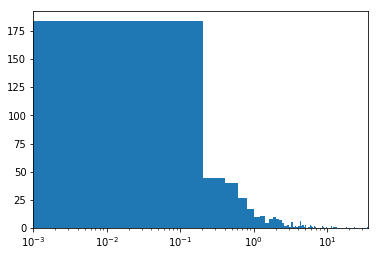

In [6]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(data['precip'], bins=np.arange(0.001,36.001,0.2))
plt.xlim([0.001,36.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[:179] + 0.1
#bin_centers
#print(a)

In [7]:
bin_centers

array([ 0.101,  0.301,  0.501,  0.701,  0.901,  1.101,  1.301,  1.501,
        1.701,  1.901,  2.101,  2.301,  2.501,  2.701,  2.901,  3.101,
        3.301,  3.501,  3.701,  3.901,  4.101,  4.301,  4.501,  4.701,
        4.901,  5.101,  5.301,  5.501,  5.701,  5.901,  6.101,  6.301,
        6.501,  6.701,  6.901,  7.101,  7.301,  7.501,  7.701,  7.901,
        8.101,  8.301,  8.501,  8.701,  8.901,  9.101,  9.301,  9.501,
        9.701,  9.901, 10.101, 10.301, 10.501, 10.701, 10.901, 11.101,
       11.301, 11.501, 11.701, 11.901, 12.101, 12.301, 12.501, 12.701,
       12.901, 13.101, 13.301, 13.501, 13.701, 13.901, 14.101, 14.301,
       14.501, 14.701, 14.901, 15.101, 15.301, 15.501, 15.701, 15.901,
       16.101, 16.301, 16.501, 16.701, 16.901, 17.101, 17.301, 17.501,
       17.701, 17.901, 18.101, 18.301, 18.501, 18.701, 18.901, 19.101,
       19.301, 19.501, 19.701, 19.901, 20.101, 20.301, 20.501, 20.701,
       20.901, 21.101, 21.301, 21.501, 21.701, 21.901, 22.101, 22.301,
      

In [8]:
sums = n*bin_centers
sums

array([18.584, 13.244, 20.04 , 18.927, 15.317, 11.01 , 14.311,  6.004,
       13.608, 19.01 , 16.808, 16.107, 10.004,  5.402,  8.703,  3.101,
       16.505,  3.501,  7.402,  3.901,  8.202, 25.806,  9.002, 14.103,
        4.901, 15.303,  0.   ,  5.501,  5.701, 17.703, 12.202,  6.301,
        0.   , 13.402,  6.901,  0.   ,  0.   , 15.002,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , 17.402,  8.901,  0.   ,  0.   ,  0.   ,
        9.701,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       11.301, 23.002,  0.   ,  0.   , 12.101,  0.   , 12.501,  0.   ,
       12.901,  0.   , 13.301,  0.   ,  0.   , 13.901, 14.101,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 17.501,
        0.   ,  0.   ,  0.   , 18.301, 18.501,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , 21.901,  0.   ,  0.   ,
      

In [9]:
sums.cumsum()

array([ 18.584,  31.828,  51.868,  70.795,  86.112,  97.122, 111.433,
       117.437, 131.045, 150.055, 166.863, 182.97 , 192.974, 198.376,
       207.079, 210.18 , 226.685, 230.186, 237.588, 241.489, 249.691,
       275.497, 284.499, 298.602, 303.503, 318.806, 318.806, 324.307,
       330.008, 347.711, 359.913, 366.214, 366.214, 379.616, 386.517,
       386.517, 386.517, 401.519, 401.519, 401.519, 401.519, 401.519,
       401.519, 418.921, 427.822, 427.822, 427.822, 427.822, 437.523,
       437.523, 437.523, 437.523, 437.523, 437.523, 437.523, 437.523,
       448.824, 471.826, 471.826, 471.826, 483.927, 483.927, 496.428,
       496.428, 509.329, 509.329, 522.63 , 522.63 , 522.63 , 536.531,
       550.632, 550.632, 550.632, 550.632, 550.632, 550.632, 550.632,
       550.632, 550.632, 550.632, 550.632, 550.632, 550.632, 550.632,
       550.632, 550.632, 550.632, 568.133, 568.133, 568.133, 568.133,
       586.434, 604.935, 604.935, 604.935, 604.935, 604.935, 604.935,
       604.935, 604.

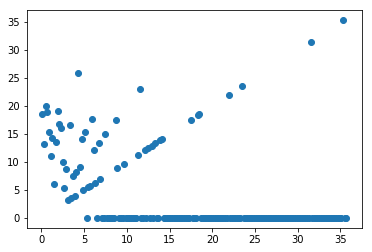

In [10]:
plt.scatter(x=bin_centers, y=sums)

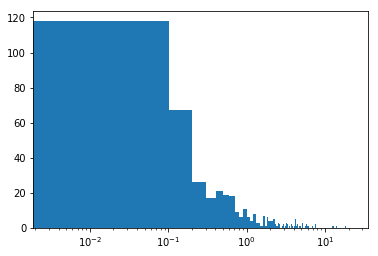

Sum of all binned rainfall= 712.6834102715867 mm


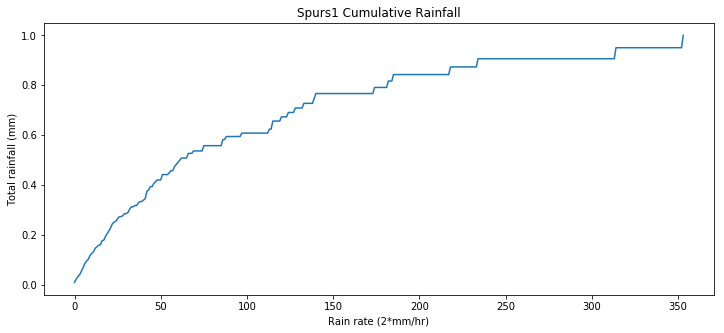

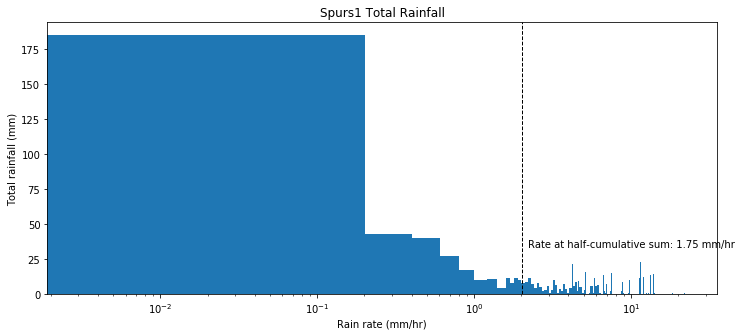

Sum of all binned rainfall= 717.3334102715867 mm


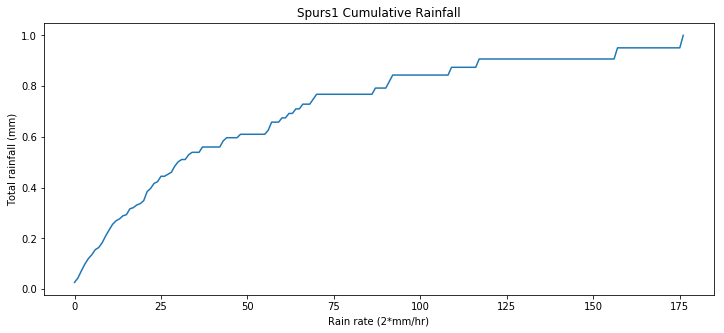

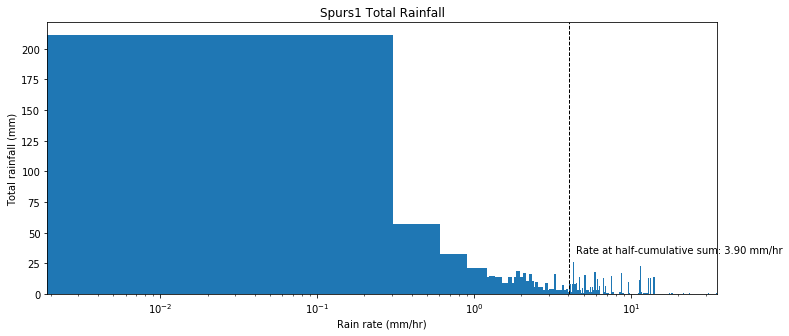

Sum of all binned rainfall= 723.9834102715868 mm


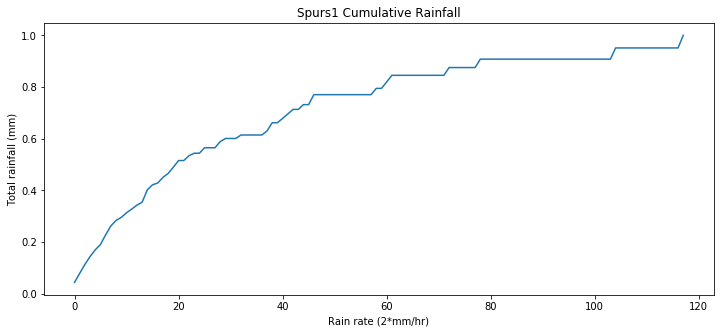

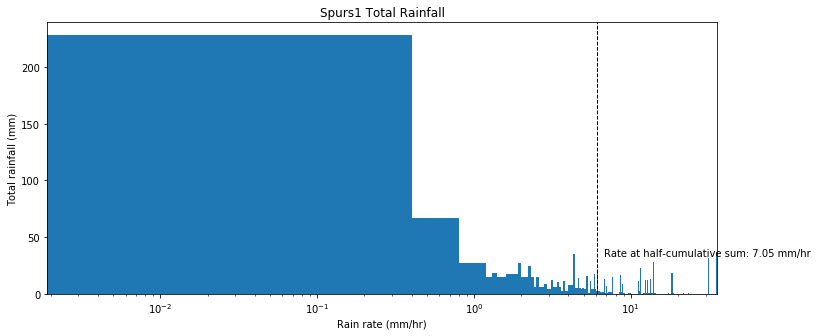

Sum of all binned rainfall= 733.8334102715868 mm


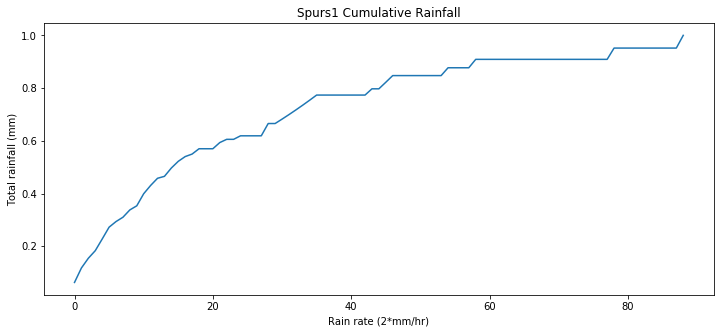

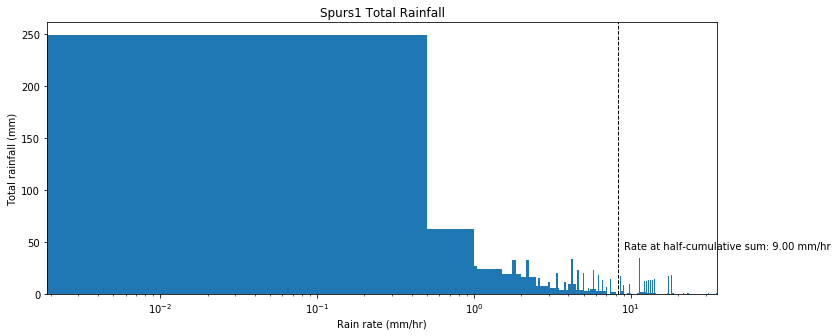

Sum of all binned rainfall= 741.5834102715867 mm


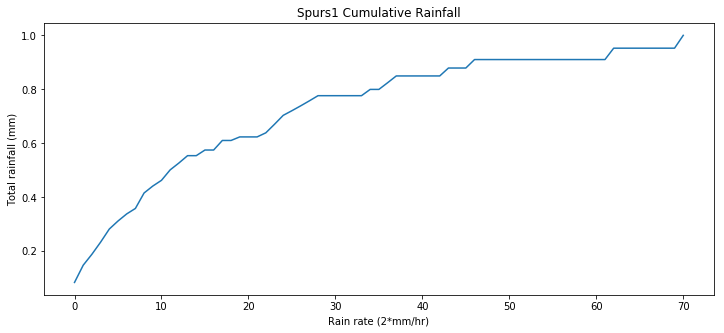

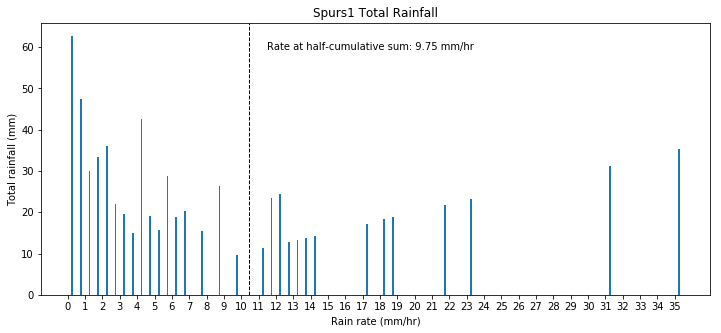

In [14]:
import math
rain = data[data['precip'] > 1e-3]['precip']
sizes = [0.1, 0.2, 0.3, 0.4, 0.5]


import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

for val in sizes:
    (n, bins, patches) = plt.hist(rain, bins=np.arange(min(rain), max(rain) + val, val))
    bin_centers = bins[:(bins.shape[0]-1)] + val/2
    plt.xlim([min(rain), max(rain)])
    plt.xscale('log')
    plt.show()

    sums = n*bin_centers
    print('Sum of all binned rainfall= {} mm'.format(sums.sum()))

    fullsum = sums.cumsum()/sums.sum()
    halfsum = (sums.cumsum()/sums.sum())[:math.ceil(max(sums))]

    _, ax = plt.subplots(figsize=(12,5))
    plt.plot(fullsum)
    plt.xlabel('Rain rate (2*mm/hr)')
    plt.ylabel('Total rainfall (mm)')
    plt.title('Spurs1 Cumulative Rainfall')


    _, ax = plt.subplots(figsize=(12,5))
    plt.bar(x=bin_centers, height=sums, width=0.1)
    plt.xlabel('Rain rate (mm/hr)')
    plt.ylabel('Total rainfall (mm)')
    plt.title('{} Total Rainfall'.format('Spurs1'))
    plt.xticks(np.arange(min(rain), max(rain), 1))

    plt.axvline(sums.mean(), color='k', linestyle='dashed', linewidth=1)
    _, max_ = plt.ylim()
    plt.text(sums.mean() + sums.mean()/10, max_ - max_/10, 
                'Rate at half-cumulative sum: {:.2f} mm/hr'.format(find_nearest(sums, sums.mean())));
plt.show()

So we can see that the mean split of rainfall occurs at different places based on the bin sizes...

In [15]:
rain = data[data['precip'] > 1e-3]['precip']
print(rain.median())
print(rain.mean())
#print(rain.cumsum())

0.3757364514794972
1.6216867217583306


In [16]:
ordered_rain = rain.sort_values(ascending=True)
new_sum = np.array(ordered_rain).cumsum()
scaled_sum = new_sum/new_sum.max()
len(scaled_sum[scaled_sum >= 0.5])
#new_sum[-11:]
ordered_rain[-26:]

new_time
2013-01-31 19:30:00.000000000     6.249350
2012-12-06 02:30:00.000028800     6.610404
2012-10-27 00:29:59.999971200     6.618776
2013-02-24 06:29:59.999971200     6.937127
2013-01-16 03:29:59.999971200     7.549513
2013-09-22 20:30:00.000028800     7.597011
2012-12-06 03:29:59.999971200     8.614325
2013-01-31 23:30:00.000028800     8.616783
2013-05-06 23:30:00.000028800     8.848182
2013-09-13 10:30:00.000000000     9.738845
2012-11-22 21:29:59.999971200    11.374038
2013-01-15 16:30:00.000000000    11.559571
2013-02-02 13:30:00.000000000    11.565908
2013-01-31 18:29:59.999971200    12.017001
2012-09-27 08:30:00.000028800    12.415339
2012-11-13 02:30:00.000028800    12.811936
2012-11-13 01:30:00.000000000    13.334355
2013-03-13 03:29:59.999971200    13.925118
2013-09-13 11:30:00.000028800    14.092374
2012-09-26 09:29:59.999971200    17.489069
2012-10-27 01:30:00.000000000    18.220710
2012-12-27 20:30:00.000028800    18.527092
2012-09-26 06:29:59.999971200    21.805598
20

In [17]:
find_nearest(scaled_sum, 0.5)

0.49880877389014033

First Quantile of Annual Rainfall 0.09045489531502883
Midpoint of Annual Rainfall 0.3757364514794972
Third Quantile of Annual Rainfall 1.279230052346373


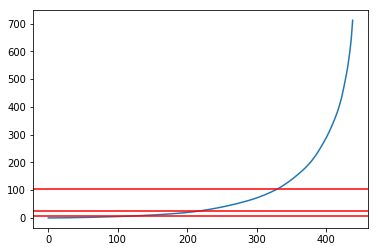

In [18]:
plt.plot(new_sum)
plt.axhline(y=np.quantile(new_sum, 0.5), c='r')
plt.axhline(y=np.quantile(new_sum, 0.75), c='r')
plt.axhline(y=np.quantile(new_sum, 0.25), c='r')
print('First Quantile of Annual Rainfall', np.quantile(ordered_rain, 0.25))
print('Midpoint of Annual Rainfall', np.quantile(ordered_rain, 0.50))
print('Third Quantile of Annual Rainfall', np.quantile(ordered_rain, 0.75))

In [20]:
print(26/len(rain))

0.05922551252847381


For this week: 

1 ) Paper

2 ) Bins based on ordered values-- never mind

3 ) Compare with bins based on time (interpret difference)

4 ) Compare structure across buoys

## Lagged Time Variables

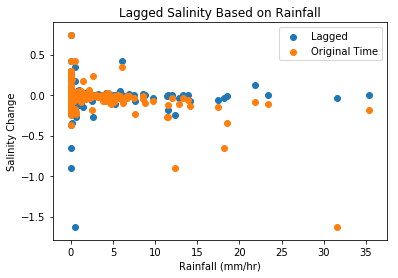

In [221]:
rainlag = data['precip'].reset_index().drop('new_time', axis=1)
pct_lag = data['sss_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0)
#lagged = pd.DataFrame(rainlag, pct_lag)
#pct_lag
plt.scatter(x=rainlag, y=pct_lag, label='Lagged')
plt.scatter(x=data['precip'], y=data['sss_change'], label='Original Time')
plt.title('Lagged Salinity Based on Rainfall')
plt.ylabel('Salinity Change')
plt.xlabel('Rainfall (mm/hr)')
plt.legend()
plt.show()

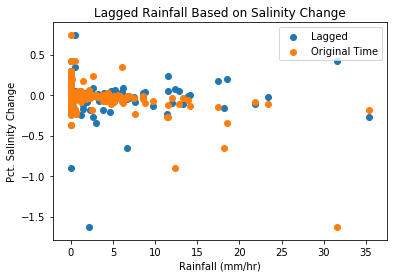

In [222]:
rainlag = pd.DataFrame(data['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
pct_lag = pd.DataFrame(data['sss_change'].reset_index().drop('new_time', axis=1))
newlagged = pd.concat([rainlag, pct_lag], axis=1, join='outer')
#pct_lag
plt.scatter(x=rainlag, y=pct_lag, label='Lagged')
plt.scatter(x=data['precip'], y=data['sss_change'], label='Original Time')
plt.title('Lagged Rainfall Based on Salinity Change')
plt.ylabel('Pct. Salinity Change')
plt.xlabel('Rainfall (mm/hr)')
plt.legend()
plt.show()

In [223]:
#The lagged on salinity set -- did rain cause change
lagged = pd.concat([rainlag, pct_lag], axis=1, join='outer')
lagged.corr()

,precip,sss_change
precip,1.000000,-0.042785
sss_change,-0.042785,1.000000


In [224]:
## Lagged on Rainfall-- did salinity cause precip
newlagged.corr()

,precip,sss_change
precip,1.000000,-0.042785
sss_change,-0.042785,1.000000


In [226]:
## The unaltered original set
data[['precip', 'sss_change']].corr()

,precip,sss_change
precip,1.000000,-0.498071
sss_change,-0.498071,1.000000


In [227]:
## Only when rain occurred...
rain = data[data['precip'] > 0]

rain[['precip', 'sss_change']].corr()

,precip,sss_change
precip,1.000000,-0.587399
sss_change,-0.587399,1.000000


So for Spurs1, we can conclude that the greatest effect that occurs with percent change in salinity and rainfall is 

a) when rainfall is present, and 

b)within the same hour that it occurs

## Other Possible Correlations?

In [228]:
data[['precip','sss','sss_change']].head(20)

,precip,sss,sss_change
new_time,,,
2012-09-14 20:30:00.000028800,0.0,37.768217,0.000000
2012-09-14 21:29:59.999971200,0.0,37.767291,-0.000926
2012-09-14 22:30:00.000000000,0.0,37.767912,0.000621
2012-09-14 23:30:00.000028800,0.0,37.768554,0.000642
2012-09-15 00:29:59.999971200,0.0,37.770119,0.001566
2012-09-15 01:30:00.000000000,0.0,37.771025,0.000906
2012-09-15 02:30:00.000028800,0.0,37.771811,0.000786
2012-09-15 03:29:59.999971200,0.0,37.771269,-0.000543
2012-09-15 04:30:00.000000000,0.0,37.771532,0.000263


In [229]:
## We can see that, directly, no variable has a strong correlation with rainfall here
data.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
sss_change,0.002661,0.125786,0.004978,0.017742,-0.000010,-0.498071,-0.191359,-0.022051,0.002398,-0.000898,...,0.125786,-0.000010,0.017742,0.004978,0.999943,0.999943,0.150517,-0.003316,-0.000233,1.000000
pct_change,0.002173,0.123316,0.005419,0.017342,0.000020,-0.494760,-0.186965,-0.018409,0.001891,-0.000643,...,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208,0.999943
pct_c_scaled,0.002173,0.123316,0.005419,0.017342,0.000020,-0.494760,-0.186965,-0.018409,0.001891,-0.000643,...,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208,0.999943
sss,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.146640,-0.205460,-0.189729,-0.582284,0.413149,...,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227,0.125786
scaled_sss,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.146640,-0.205460,-0.189729,-0.582284,0.413149,...,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227,0.125786
sst_pct_change,0.017023,-0.002574,0.020228,-0.065783,0.051786,-0.078119,-0.049622,-0.008179,0.015436,-0.006962,...,-0.002574,0.051786,-0.065783,0.020228,0.150344,0.150344,1.000000,0.007051,0.019055,0.150517
time,1.000000,-0.490410,-0.028141,-0.081938,-0.165012,-0.054599,-0.079178,-0.102178,0.781248,-0.180050,...,-0.490410,-0.165012,-0.081938,-0.028141,0.002173,0.002173,0.017023,-0.016946,-0.012835,0.002661
year,0.781248,-0.582284,-0.451809,-0.183468,-0.077554,-0.032837,-0.047648,-0.061545,1.000000,-0.752442,...,-0.582284,-0.077554,-0.183468,-0.451809,0.001891,0.001891,0.015436,-0.000591,-0.001091,0.002398
hour,-0.000321,0.005961,0.039154,0.003517,-0.057326,-0.020887,-0.031171,-0.033088,-0.001676,-0.000302,...,0.005961,-0.057326,0.003517,0.039154,0.004359,0.004358,-0.013393,0.002039,0.010116,0.004629
dir_pct_change,-0.016946,0.000784,-0.025444,0.010975,-0.023398,-0.010222,0.000680,0.000494,-0.000591,-0.017146,...,0.000784,-0.023398,0.010975,-0.025444,-0.003384,-0.003384,0.007051,1.000000,-0.013428,-0.003316


In [230]:
rain_prev = data['precip'].reset_index().drop('new_time', axis=1).shift(-1).fillna(0)
data_prev = data.reset_index().drop(['new_time', 'precip'], axis=1)
data_prev = pd.concat([rain_prev,data_prev], axis=1, join='outer')


rain_lagged = data['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0)
data_lagged = data.reset_index().drop(['new_time', 'precip'], axis=1)
data_lagged = pd.concat([rain_lagged,data_lagged], axis=1, join='outer')
data_lagged.head()

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
0,0.0,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,2012,9,...,-0.223661,-1.120622,2.145583,0.000000,0.000000,Spurs1,0.000000,0.000000,0.000000,0.000000
1,0.0,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,2012,9,...,-0.285520,-0.968037,2.081695,-0.000025,-0.031722,Spurs1,-1.374910,0.135314,0.293850,-0.000926
2,0.0,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,2012,9,...,-0.345568,-0.358302,2.028844,0.000016,0.022122,Spurs1,-1.141199,0.126846,1.265220,0.000621
3,0.0,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,2012,9,...,-0.369664,-0.519302,1.982482,0.000017,0.022846,Spurs1,-1.003867,0.091158,-0.334265,0.000642
4,0.0,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,2012,9,...,-0.403631,-0.605983,1.942557,0.000041,0.054988,Spurs1,-0.866609,0.098501,-0.227134,0.001566


In [231]:
data_prev.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
time,-0.054632,1.000000,-0.490410,-0.028141,-0.081938,-0.165012,-0.079178,-0.102178,0.781248,-0.180050,...,-0.490410,-0.165012,-0.081938,-0.028141,0.002173,0.002173,0.017023,-0.016946,-0.012835,0.002661
sss_change,-0.040800,0.002661,0.125786,0.004978,0.017742,-0.000010,-0.191359,-0.022051,0.002398,-0.000898,...,0.125786,-0.000010,0.017742,0.004978,0.999943,0.999943,0.150517,-0.003316,-0.000233,1.000000
pct_change,-0.039988,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208,0.999943
pct_c_scaled,-0.039988,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208,0.999943
year,-0.032837,0.781248,-0.582284,-0.451809,-0.183468,-0.077554,-0.047648,-0.061545,1.000000,-0.752442,...,-0.582284,-0.077554,-0.183468,-0.451809,0.001891,0.001891,0.015436,-0.000591,-0.001091,0.002398
sst_pct_change,-0.030941,0.017023,-0.002574,0.020228,-0.065783,0.051786,-0.049622,-0.008179,0.015436,-0.006962,...,-0.002574,0.051786,-0.065783,0.020228,0.150344,0.150344,1.000000,0.007051,0.019055,0.150517
sss,-0.019701,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227,0.125786
scaled_sss,-0.019701,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227,0.125786
hour,-0.011717,-0.000321,0.005961,0.039154,0.003517,-0.057326,-0.031171,-0.033088,-0.001676,-0.000302,...,0.005961,-0.057326,0.003517,0.039154,0.004359,0.004358,-0.013393,0.002039,0.010116,0.004629
month,-0.007908,-0.180050,0.413149,0.680423,0.217663,-0.059145,-0.011065,-0.014113,-0.752442,1.000000,...,0.413149,-0.059145,0.217663,0.680423,-0.000643,-0.000643,-0.006962,-0.017146,-0.014330,-0.000898


In [232]:
data_lagged.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
sss,-0.157563,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227,0.125786
scaled_sss,-0.157563,-0.490410,1.000000,0.411407,0.128199,0.067080,-0.205460,-0.189729,-0.582284,0.413149,...,1.000000,0.067080,0.128199,0.411407,0.123316,0.123316,-0.002574,0.000784,-0.024227,0.125786
time,-0.054566,1.000000,-0.490410,-0.028141,-0.081938,-0.165012,-0.079178,-0.102178,0.781248,-0.180050,...,-0.490410,-0.165012,-0.081938,-0.028141,0.002173,0.002173,0.017023,-0.016946,-0.012835,0.002661
sss_change,-0.042785,0.002661,0.125786,0.004978,0.017742,-0.000010,-0.191359,-0.022051,0.002398,-0.000898,...,0.125786,-0.000010,0.017742,0.004978,0.999943,0.999943,0.150517,-0.003316,-0.000233,1.000000
pct_change,-0.039580,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208,0.999943
pct_c_scaled,-0.039580,0.002173,0.123316,0.005419,0.017342,0.000020,-0.186965,-0.018409,0.001891,-0.000643,...,0.123316,0.000020,0.017342,0.005419,1.000000,1.000000,0.150344,-0.003384,-0.000208,0.999943
year,-0.032837,0.781248,-0.582284,-0.451809,-0.183468,-0.077554,-0.047648,-0.061545,1.000000,-0.752442,...,-0.582284,-0.077554,-0.183468,-0.451809,0.001891,0.001891,0.015436,-0.000591,-0.001091,0.002398
sst_pct_change,-0.032643,0.017023,-0.002574,0.020228,-0.065783,0.051786,-0.049622,-0.008179,0.015436,-0.006962,...,-0.002574,0.051786,-0.065783,0.020228,0.150344,0.150344,1.000000,0.007051,0.019055,0.150517
hour,-0.025757,-0.000321,0.005961,0.039154,0.003517,-0.057326,-0.031171,-0.033088,-0.001676,-0.000302,...,0.005961,-0.057326,0.003517,0.039154,0.004359,0.004358,-0.013393,0.002039,0.010116,0.004629
sst,-0.007781,-0.028141,0.411407,1.000000,0.005372,-0.136030,-0.010484,-0.011724,-0.451809,0.680423,...,0.411407,-0.136030,0.005372,1.000000,0.005419,0.005419,0.020228,-0.025444,0.009284,0.004978


So every correlation is much worse when we try to lag rainfall by an hour... doesn't appear as if each variable, nor the change in them, have much effect. It is even worse when we try to see if rain has a casual effect on any other variable.

## Only Rain Events That Changed Salinity?

In [233]:
first_one = data[(data['precip'] > 1e-4) & (data['sss_change'] < 0)]
first_one

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
new_time,,,,,,,,,,,,,,,,,,,,,
2012-09-23 04:30:00.000000000,735135.187500,37.596840,27.444979,7.368190,-140.730838,0.773307,0.773307,0.773307,2012,9,...,-0.751004,0.762403,1.840076,-3.048259e-04,-0.400049,Spurs1,-0.109685,0.038141,0.178607,-0.011464
2012-09-23 23:30:00.000028800,735135.979167,37.673946,27.457512,6.488239,-173.018242,0.904011,0.904011,0.904011,2012,9,...,-0.993105,0.367572,1.848748,-2.508697e-04,-0.329147,Spurs1,-0.336891,0.100233,-0.194550,-0.009454
2012-09-24 02:30:00.000028800,735136.104167,37.666103,27.426378,6.301143,-138.351357,0.489207,0.489207,1.393218,2012,9,...,-0.733162,0.283623,1.827206,-1.286679e-04,-0.168566,Spurs1,-0.156590,0.023876,-0.059006,-0.004847
2012-09-25 10:30:00.000000000,735137.437500,37.566335,27.242192,0.481440,87.184417,3.766850,3.774213,3.774213,2012,9,...,0.957975,-2.327652,1.699761,-2.092344e-03,-2.748967,Spurs1,-0.682966,-0.106861,-2.885735,-0.078767
2012-09-25 11:30:00.000028800,735137.479167,37.380579,27.164036,2.491036,93.226520,2.468046,6.242260,6.242260,2012,9,...,1.003280,-1.425955,1.645682,-4.944742e-03,-6.497209,Spurs1,-1.191365,0.108921,14.415179,-0.185756
2012-09-25 18:29:59.999971200,735137.770833,37.413277,27.674026,4.398114,-133.725567,4.419203,4.419203,4.419203,2012,9,...,-0.698477,-0.570258,1.998563,-1.221464e-03,-1.604573,Spurs1,-3.689972,-0.896109,3.896083,-0.045755
2012-09-25 23:30:00.000028800,735137.979167,37.408310,27.250848,4.332133,-137.227691,2.150114,2.150114,6.569316,2012,9,...,-0.724737,-0.599863,1.705750,-1.097659e-03,-1.441884,Spurs1,-3.417893,-0.057194,-0.023114,-0.041107
2012-09-26 00:29:59.999971200,735138.020833,35.779951,26.775896,2.586057,-129.164571,31.498263,33.648376,33.648376,2012,9,...,-0.664277,-1.383320,1.377113,-4.352935e-02,-57.199954,Spurs1,-7.236609,0.038322,-1.477955,-1.628359
2012-09-26 06:29:59.999971200,735138.270833,37.361535,27.203058,4.718184,-10.870177,21.805598,21.805598,28.832958,2012,9,...,0.222731,-0.426643,1.672682,-2.283161e-03,-2.999713,Spurs1,0.446147,-0.530651,0.992015,-0.085498


In [234]:
second_one = data_lagged[(data_lagged['precip'] > 1e-4) & (data_lagged['sss_change'] < 0)]
second_one

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
220,0.904011,735136.020833,37.671240,27.444786,5.304733,-176.023607,0.904011,0.904011,2012,9,...,-1.015640,-0.163462,1.839943,-7.182463e-05,-0.093870,Spurs1,-0.192630,0.080291,-0.711823,-0.002706
254,0.007363,735137.437500,37.566335,27.242192,0.481440,87.184417,3.774213,3.774213,2012,9,...,0.957975,-2.327652,1.699761,-2.092344e-03,-2.748967,Spurs1,-0.682966,-0.106861,-2.885735,-0.078767
255,3.766850,735137.479167,37.380579,27.164036,2.491036,93.226520,6.242260,6.242260,2012,9,...,1.003280,-1.425955,1.645682,-4.944742e-03,-6.497209,Spurs1,-1.191365,0.108921,14.415179,-0.185756
263,4.419203,735137.812500,37.383024,27.484954,3.671207,-164.445360,4.419203,4.419203,2012,9,...,-0.928823,-0.896418,1.867737,-8.086269e-04,-1.062077,Spurs1,-2.836871,0.197359,-0.652341,-0.030253
268,2.150114,735138.020833,35.779951,26.775896,2.586057,-129.164571,33.648376,33.648376,2012,9,...,-0.664277,-1.383320,1.377113,-4.352935e-02,-57.199954,Spurs1,-7.236609,0.038322,-1.477955,-1.628359
275,21.805598,735138.312500,37.253655,27.153605,1.291647,81.435379,21.805598,28.287033,2012,9,...,0.914867,-1.964116,1.638464,-2.887471e-03,-3.793817,Spurs1,-0.754995,-4.610651,-2.600144,-0.107880
277,0.269411,735138.395833,37.040535,26.930026,0.849258,40.704551,17.758480,39.564078,2012,9,...,0.609454,-2.162614,1.483761,-4.019966e-03,-5.281991,Spurs1,-1.433742,-0.793362,-2.329977,-0.149503
279,1.420564,735138.479167,37.038911,26.879510,3.213341,-141.489096,19.440171,41.515180,2012,9,...,-0.756690,-1.101860,1.448808,-4.580425e-03,-6.018472,Spurs1,-1.702276,0.163966,17.104018,-0.170435
280,0.530539,735138.520833,37.016396,26.856301,5.585982,-119.959926,1.951102,19.709583,2012,9,...,-0.595258,-0.037266,1.432749,-6.078795e-04,-0.798282,Spurs1,-0.358692,-0.013171,2.485350,-0.022515
298,1.985584,735139.270833,37.361392,27.109061,2.282771,71.868765,3.220001,3.220001,2012,9,...,0.843133,-1.519403,1.607642,-2.232980e-03,-2.933772,Spurs1,-0.939121,-0.243637,-1.065911,-0.083614


In [235]:
last_one = data_prev[(data_prev['precip'] > 1e-4) & (data_prev['sss_change'] < 0)]
last_one

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
199,0.773307,735135.145833,37.608304,27.452218,6.860292,-149.568359,0.000000e+00,0.000000e+00,2012,9,...,-0.817271,0.534511,1.845086,-0.000028,-0.036661,Spurs1,-0.011426,0.185754,0.503552,-0.001064
218,0.904011,735135.937500,37.683400,27.479796,6.712672,-164.225116,0.000000e+00,0.000000e+00,2012,9,...,-0.927172,0.468274,1.864168,-0.000488,-0.641285,Spurs1,-0.670332,0.081326,-0.313554,-0.018414
221,0.489207,735136.062500,37.670950,27.436713,6.266038,-151.197296,9.040106e-01,9.040106e-01,2012,9,...,-0.829485,0.267872,1.834357,-0.000008,-0.009602,Spurs1,-0.122319,-0.007039,0.550770,-0.000290
254,2.468046,735137.437500,37.566335,27.242192,0.481440,87.184417,3.774213e+00,3.774213e+00,2012,9,...,0.957975,-2.327652,1.699761,-0.002092,-2.748967,Spurs1,-0.682966,-0.106861,-2.885735,-0.078767
266,2.150114,735137.937500,37.449417,27.477025,4.264166,-178.685534,-8.881784e-16,4.419203e+00,2012,9,...,-1.035600,-0.630359,1.862250,-0.000713,-0.936321,Spurs1,-1.869836,0.074966,1.452030,-0.026718
267,31.498263,735137.979167,37.408310,27.250848,4.332133,-137.227691,2.150114e+00,6.569316e+00,2012,9,...,-0.724737,-0.599863,1.705750,-0.001098,-1.441884,Spurs1,-3.417893,-0.057194,-0.023114,-0.041107
268,0.545924,735138.020833,35.779951,26.775896,2.586057,-129.164571,3.364838e+01,3.364838e+01,2012,9,...,-0.664277,-1.383320,1.377113,-0.043529,-57.199954,Spurs1,-7.236609,0.038322,-1.477955,-1.628359
275,0.269411,735138.312500,37.253655,27.153605,1.291647,81.435379,2.180560e+01,2.828703e+01,2012,9,...,0.914867,-1.964116,1.638464,-0.002887,-3.793817,Spurs1,-0.754995,-4.610651,-2.600144,-0.107880
276,17.489069,735138.354167,37.190038,27.023329,2.415636,-71.742845,2.207501e+01,2.253904e+01,2012,9,...,-0.233711,-1.459787,1.548321,-0.001708,-2.243485,Spurs1,-1.992202,-0.966253,2.943084,-0.063617
277,1.420564,735138.395833,37.040535,26.930026,0.849258,40.704551,1.775848e+01,3.956408e+01,2012,9,...,0.609454,-2.162614,1.483761,-0.004020,-5.281991,Spurs1,-1.433742,-0.793362,-2.329977,-0.149503


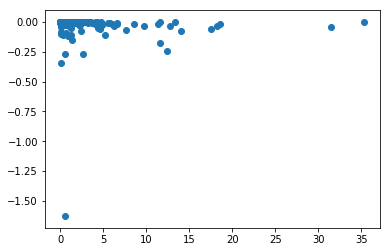

In [237]:
plt.scatter(last_one['precip'], last_one['sss_change'])
#plt.ylim([-.01,0])

So, looking at the statistical differences between the three sets (original, lagged w/ rain, not lagged)

In [243]:
data.loc['2012-09-26 00:29:59.999971200']

time                 735138
sss                   35.78
sst                 26.7759
wind_spd            2.58606
wind_dir           -129.165
precip              31.4983
cum_precip3         33.6484
cum_precip6         33.6484
year                   2012
month                     9
day                      26
hour                      0
scaled_sss          -15.065
scaled_dir        -0.664277
scaled_spd         -1.38332
scaled_sst          1.37711
pct_change       -0.0435293
pct_c_scaled          -57.2
set                  Spurs1
sst_pct_change     -7.23661
dir_pct_change    0.0383223
spd_pct_change     -1.47796
sss_change         -1.62836
Name: 2012-09-26 00:29:59.999971200, dtype: object

In [244]:
data.describe()

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
count,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9.133000e+03,9.133000e+03,9133.000000,9133.000000,...,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9.133000e+03,9133.000000
mean,735317.104167,37.452374,24.785667,5.669037,-40.574359,0.077950,2.338511e-01,4.677022e-01,2012.715756,6.627067,...,4.356771e-17,-6.223959e-18,6.223959e-17,1.493750e-15,-3.897764e-07,3.306478e-18,-1.166992e-18,-3.889974e-18,-1.555990e-18,-0.000026
std,109.858931,0.111020,1.445297,2.228804,133.370699,0.889278,1.838534e+00,2.846768e+00,0.451078,3.412215,...,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,7.609964e-04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.028290
min,735126.854167,35.779951,22.538164,0.074492,-179.996089,0.000000,-8.881784e-16,-1.111611e-14,2012.000000,1.000000,...,-1.506505e+01,-1.045427e+00,-2.510248e+00,-1.555131e+00,-4.352935e-02,-5.719995e+01,-1.307454e+01,-5.683598e+01,-3.256417e+00,-1.628359
25%,735221.979167,37.397080,23.514452,4.142106,-160.589457,0.000000,3.552714e-15,-7.049916e-15,2012.000000,4.000000,...,-4.980778e-01,-8.999103e-01,-6.851273e-01,-8.796012e-01,-3.409598e-05,-4.429214e-02,-2.355221e-01,4.519201e-02,-2.714331e-01,-0.001279
50%,735317.104167,37.443125,24.405348,5.821573,-112.732046,0.000000,5.995204e-15,-6.217249e-15,2013.000000,7.000000,...,-8.331470e-02,-5.410607e-01,6.844235e-02,-2.631571e-01,4.032885e-06,5.811728e-03,-6.153411e-02,6.812273e-02,-8.814773e-02,0.000151
75%,735412.229167,37.522721,26.071212,7.255449,91.897439,0.000000,6.217249e-15,1.243450e-14,2013.000000,9.000000,...,6.336848e-01,9.933145e-01,7.118160e-01,8.895163e-01,4.505486e-05,5.971734e-02,1.629043e-01,8.688784e-02,1.212322e-01,0.001690
max,735507.354167,37.815080,30.004906,15.389553,179.993404,35.374674,4.956424e+01,5.178967e+01,2013.000000,12.000000,...,3.267231e+00,1.653885e+00,4.361553e+00,3.611385e+00,2.022166e-02,2.657312e+01,1.587474e+01,2.512226e+01,3.109118e+01,0.739762


In [245]:
first_one.describe()

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,3.010000e+02,301.000000,301.000000,301.000000,301.000000,3.010000e+02
mean,735271.421442,37.442006,24.655993,6.453931,-0.785787,2.134034,3.463725,4.193346,2012.574751,6.797342,...,-0.093391,0.298347,0.352178,-0.089727,-8.275031e-04,-1.086882,-0.295370,-0.045977,0.092281,-3.094742e-02
std,100.783066,0.173116,1.343645,2.373467,124.918019,4.377275,6.562534,7.626976,0.495204,4.185944,...,1.559417,0.936674,1.064964,0.929718,3.237300e-03,4.254028,0.840029,2.434385,1.819697,1.209553e-01
min,735135.187500,35.779951,22.733989,0.168562,-178.963260,0.000193,0.000193,0.000193,2012.000000,1.000000,...,-15.065049,-1.037683,-2.468039,-1.419632,-4.352935e-02,-57.199954,-7.236609,-25.351279,-3.221535,-1.628359e+00
25%,735192.312500,37.403358,23.497908,5.150638,-147.764344,0.129625,0.190002,0.260304,2012.000000,2.000000,...,-0.441528,-0.803744,-0.232603,-0.891049,-4.134458e-04,-0.542783,-0.291253,-0.057194,-0.409050,-1.549039e-02
50%,735248.604167,37.444066,24.193341,6.769012,35.692515,0.534696,0.770566,1.023918,2013.000000,9.000000,...,-0.074830,0.571873,0.493554,-0.409853,-1.281258e-04,-0.167854,-0.135657,0.062119,-0.108413,-4.790596e-03
75%,735322.270833,37.561432,25.966644,8.127077,101.115903,2.033885,3.509128,4.044662,2013.000000,11.000000,...,0.982387,1.062437,1.102912,0.817161,-4.465619e-05,-0.058169,-0.049132,0.100600,0.194131,-1.675967e-03
max,735499.854167,37.673946,27.789962,11.859325,179.879731,35.374674,49.159673,49.159673,2013.000000,12.000000,...,1.995909,1.653033,2.777555,2.078783,-1.644206e-08,0.000491,4.166246,25.122256,17.104018,-6.186857e-07


In [246]:
second_one.describe()

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000,208.000000,208.000000
mean,1.886087,735280.454127,37.412903,24.650092,6.309193,-0.321616,4.274131,5.263907,2012.605769,6.725962,...,-0.355545,0.301828,0.287235,-0.093810,-1.063521e-03,-1.397025,-0.347145,0.055582,0.065320,-0.039750
std,4.201274,104.753602,0.203842,1.346045,2.492369,125.850823,7.628530,8.965854,0.489864,4.093933,...,1.836190,0.943668,1.118315,0.931379,3.848555e-03,5.057257,0.893741,2.706204,1.970343,0.143786
min,0.000193,735136.020833,35.779951,22.733989,0.481440,-177.773152,0.033381,0.033381,2012.000000,1.000000,...,-15.065049,-1.028759,-2.327652,-1.419632,-4.352935e-02,-57.199954,-7.236609,-25.351279,-3.055277,-1.628359
25%,0.096098,735200.677083,37.372707,23.485773,5.037889,-149.443459,0.208620,0.272344,2012.000000,2.000000,...,-0.717633,-0.816334,-0.283194,-0.899445,-4.551379e-04,-0.597569,-0.424936,-0.010571,-0.455003,-0.017023
50%,0.279955,735250.687500,37.432192,24.183856,6.686815,35.103693,0.866691,1.255205,2013.000000,8.000000,...,-0.181798,0.567457,0.456673,-0.416416,-1.318325e-04,-0.172724,-0.193676,0.069009,-0.079468,-0.004960
75%,1.679150,735348.197917,37.538516,25.993130,8.038170,112.363143,4.344946,4.915794,2013.000000,11.000000,...,0.775964,1.146773,1.063019,0.835488,-3.182789e-05,-0.041312,-0.049235,0.109386,0.260120,-0.001187
max,35.374674,735499.895833,37.671240,27.734013,11.330720,179.852497,49.159673,49.159673,2013.000000,12.000000,...,1.971534,1.652829,2.540373,2.040070,-7.015076e-07,-0.000410,4.560293,25.122256,17.104018,-0.000026


In [247]:
last_one.describe()

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,2.400000e+02,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000
mean,1.954784,735273.350347,37.452140,24.592736,6.534301,-12.107681,2.908478e+00,3.595940e+00,2012.583333,6.741667,...,-0.002106,0.213452,0.388240,-0.133496,-6.168294e-04,-0.810043,-0.287617,0.055791,0.079275,-0.023082
std,4.263061,100.066004,0.155775,1.322508,2.247197,123.289341,6.648127e+00,7.583798e+00,0.494037,4.261329,...,1.403211,0.924462,1.008307,0.915092,3.007651e-03,3.952255,0.964068,2.249501,1.494246,0.112507
min,0.000193,735135.145833,35.779951,22.733989,0.481440,-179.975094,-8.881784e-16,-1.111611e-14,2012.000000,1.000000,...,-15.065049,-1.045270,-2.327652,-1.419632,-4.352935e-02,-57.199954,-7.236609,-14.798714,-2.885735,-1.628359
25%,0.111086,735201.104167,37.417386,23.484728,5.355817,-155.975901,5.329071e-15,1.093938e-14,2012.000000,2.000000,...,-0.315169,-0.865316,-0.140541,-0.900169,-2.618595e-04,-0.343589,-0.271766,-0.022296,-0.365024,-0.009811
50%,0.489599,735248.958333,37.448408,24.188397,6.792006,24.208401,1.458900e-01,2.308476e-01,2013.000000,9.000000,...,-0.035721,0.485761,0.503871,-0.413273,-7.891873e-05,-0.103192,-0.116847,0.065249,-0.126023,-0.002961
75%,1.818869,735305.833333,37.552876,25.992483,8.073941,86.717950,2.249031e+00,3.225886e+00,2013.000000,11.000000,...,0.905315,0.954477,1.079070,0.835041,-2.104187e-05,-0.027138,-0.024192,0.098510,0.213026,-0.000791
max,35.374674,735499.812500,37.683400,27.745753,11.859325,179.739996,4.915967e+01,4.915967e+01,2013.000000,12.000000,...,2.081066,1.651985,2.777555,2.048193,-1.584766e-07,0.000304,4.166246,25.122256,11.635173,-0.000006


In [248]:
first_one.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
sss_change,0.129179,0.808283,-0.170752,0.286308,0.017377,-0.620723,-0.546757,-0.491532,0.127343,-0.067363,...,0.808283,0.017377,0.286308,-0.170752,0.999994,0.999994,0.657514,-0.002461,-0.044795,1.000000
pct_change,0.129195,0.808903,-0.170695,0.286263,0.017150,-0.620168,-0.546377,-0.491371,0.127230,-0.067186,...,0.808903,0.017150,0.286263,-0.170695,1.000000,1.000000,0.657436,-0.002477,-0.045346,0.999994
pct_c_scaled,0.129195,0.808903,-0.170695,0.286263,0.017150,-0.620168,-0.546377,-0.491371,0.127230,-0.067186,...,0.808903,0.017150,0.286263,-0.170695,1.000000,1.000000,0.657436,-0.002477,-0.045346,0.999994
scaled_sss,-0.071633,1.000000,0.162535,0.362179,-0.003266,-0.510220,-0.526667,-0.527547,-0.215060,0.263802,...,1.000000,-0.003266,0.362179,0.162535,0.808903,0.808903,0.569657,-0.008337,-0.098965,0.808283
sss,-0.071633,1.000000,0.162535,0.362179,-0.003266,-0.510220,-0.526667,-0.527547,-0.215060,0.263802,...,1.000000,-0.003266,0.362179,0.162535,0.808903,0.808903,0.569657,-0.008337,-0.098965,0.808283
sst_pct_change,0.116752,0.569657,-0.146360,0.234378,0.018037,-0.409456,-0.416696,-0.393245,0.096251,-0.034528,...,0.569657,0.018037,0.234378,-0.146360,0.657436,0.657436,1.000000,-0.022687,-0.121569,0.657514
wind_spd,-0.044939,0.362179,-0.064442,1.000000,0.078493,-0.145900,-0.135699,-0.163478,-0.075244,0.081640,...,0.362179,0.078493,1.000000,-0.064442,0.286263,0.286263,0.234378,-0.016785,0.058059,0.286308
scaled_spd,-0.044939,0.362179,-0.064442,1.000000,0.078493,-0.145900,-0.135699,-0.163478,-0.075244,0.081640,...,0.362179,0.078493,1.000000,-0.064442,0.286263,0.286263,0.234378,-0.016785,0.058059,0.286308
time,1.000000,-0.071633,-0.113386,-0.044939,-0.095862,-0.105355,-0.108069,-0.133727,0.723344,-0.228846,...,-0.071633,-0.095862,-0.044939,-0.113386,0.129195,0.129195,0.116752,-0.004310,-0.045314,0.129179
hour,-0.010282,0.061015,-0.026372,-0.077033,0.006708,-0.066195,-0.093773,-0.072072,-0.002416,-0.006647,...,0.061015,0.006708,-0.077033,-0.026372,0.067346,0.067346,-0.024781,-0.028376,0.082924,0.067466


In [249]:
second_one.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
sss,-0.298398,0.023851,1.000000,0.013360,0.381798,0.035966,-0.533824,-0.541800,-0.077646,0.151692,...,1.000000,0.035966,0.381798,0.013360,0.809690,0.809690,0.637782,-0.038112,-0.130217,0.808825
scaled_sss,-0.298398,0.023851,1.000000,0.013360,0.381798,0.035966,-0.533824,-0.541800,-0.077646,0.151692,...,1.000000,0.035966,0.381798,0.013360,0.809690,0.809690,0.637782,-0.038112,-0.130217,0.808825
sst_pct_change,-0.215543,0.152498,0.637782,-0.147534,0.283598,-0.001648,-0.447374,-0.411416,0.110281,-0.014202,...,0.637782,-0.001648,0.283598,-0.147534,0.716484,0.716484,1.000000,-0.065664,-0.015829,0.716490
pct_c_scaled,-0.186435,0.185556,0.809690,-0.210433,0.305598,0.031390,-0.537943,-0.474320,0.187597,-0.099106,...,0.809690,0.031390,0.305598,-0.210433,1.000000,1.000000,0.716484,-0.005964,-0.040423,0.999993
pct_change,-0.186435,0.185556,0.809690,-0.210433,0.305598,0.031390,-0.537943,-0.474320,0.187597,-0.099106,...,0.809690,0.031390,0.305598,-0.210433,1.000000,1.000000,0.716484,-0.005964,-0.040423,0.999993
sss_change,-0.186247,0.185457,0.808825,-0.210358,0.305555,0.031701,-0.538142,-0.474277,0.187621,-0.099234,...,0.808825,0.031701,0.305555,-0.210358,0.999993,0.999993,0.716490,-0.005926,-0.039663,1.000000
scaled_spd,-0.109258,-0.018134,0.381798,-0.151820,1.000000,0.055724,-0.198848,-0.225522,-0.053759,0.074212,...,0.381798,0.055724,1.000000,-0.151820,0.305598,0.305598,0.283598,-0.031007,0.088849,0.305555
wind_spd,-0.109258,-0.018134,0.381798,-0.151820,1.000000,0.055724,-0.198848,-0.225522,-0.053759,0.074212,...,0.381798,0.055724,1.000000,-0.151820,0.305598,0.305598,0.283598,-0.031007,0.088849,0.305555
month,-0.090761,-0.190851,0.151692,0.663403,0.074212,-0.092273,-0.063874,-0.091608,-0.812924,1.000000,...,0.151692,-0.092273,0.074212,0.663403,-0.099106,-0.099106,-0.014202,-0.087057,-0.025333,-0.099234
time,-0.071417,1.000000,0.023851,-0.056955,-0.018134,-0.153763,-0.137755,-0.169541,0.724754,-0.190851,...,0.023851,-0.153763,-0.018134,-0.056955,0.185556,0.185556,0.152498,0.019701,-0.116382,0.185457


In [250]:
last_one.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
sst_pct_change,-0.165287,0.067562,0.535570,-0.102447,0.221631,0.011142,-0.317678,-0.303948,0.035602,0.015965,...,0.535570,0.011142,0.221631,-0.102447,0.541364,0.541364,1.000000,-0.062017,-0.011602,0.541286
time,-0.118392,1.000000,-0.043331,-0.047428,-0.047925,-0.142871,-0.139313,-0.161183,0.705918,-0.197862,...,-0.043331,-0.142871,-0.047925,-0.047428,0.123330,0.123330,0.067562,0.012148,0.127227,0.123311
year,-0.086871,0.705918,-0.242989,-0.501195,-0.080175,-0.043073,0.017228,0.029971,1.000000,-0.832413,...,-0.242989,-0.043073,-0.080175,-0.501195,0.096557,0.096557,0.035602,0.079926,0.109881,0.096669
sss,-0.054508,-0.043331,1.000000,0.217262,0.305601,0.005430,-0.542946,-0.541394,-0.242989,0.315196,...,1.000000,0.005430,0.305601,0.217262,0.795457,0.795457,0.535570,-0.018873,0.008522,0.795159
scaled_sss,-0.054508,-0.043331,1.000000,0.217262,0.305601,0.005430,-0.542946,-0.541394,-0.242989,0.315196,...,1.000000,0.005430,0.305601,0.217262,0.795457,0.795457,0.535570,-0.018873,0.008522,0.795159
sss_change,-0.049681,0.123311,0.795159,-0.120242,0.187263,0.018969,-0.535827,-0.482998,0.096669,-0.031940,...,0.795159,0.018969,0.187263,-0.120242,0.999999,0.999999,0.541286,0.000267,0.078817,1.000000
pct_c_scaled,-0.049644,0.123330,0.795457,-0.120164,0.187284,0.018904,-0.536019,-0.483276,0.096557,-0.031767,...,0.795457,0.018904,0.187284,-0.120164,1.000000,1.000000,0.541364,0.000260,0.078799,0.999999
pct_change,-0.049644,0.123330,0.795457,-0.120164,0.187284,0.018904,-0.536019,-0.483276,0.096557,-0.031767,...,0.795457,0.018904,0.187284,-0.120164,1.000000,1.000000,0.541364,0.000260,0.078799,0.999999
wind_spd,-0.032653,-0.047925,0.305601,-0.062806,1.000000,0.090412,-0.055974,-0.099458,-0.080175,0.087911,...,0.305601,0.090412,1.000000,-0.062806,0.187284,0.187284,0.221631,0.060509,-0.001978,0.187263
scaled_spd,-0.032653,-0.047925,0.305601,-0.062806,1.000000,0.090412,-0.055974,-0.099458,-0.080175,0.087911,...,0.305601,0.090412,1.000000,-0.062806,0.187284,0.187284,0.221631,0.060509,-0.001978,0.187263


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9133 entries, 2012-09-14 20:30:00.000028800 to 2013-09-30 08:30:00.000028800
Data columns (total 23 columns):
time              9133 non-null float64
sss               9133 non-null float64
sst               9133 non-null float64
wind_spd          9133 non-null float64
wind_dir          9133 non-null float64
precip            9133 non-null float64
cum_precip3       9133 non-null float64
cum_precip6       9133 non-null float64
year              9133 non-null int64
month             9133 non-null int64
day               9133 non-null int64
hour              9133 non-null int64
scaled_sss        9133 non-null float64
scaled_dir        9133 non-null float64
scaled_spd        9133 non-null float64
scaled_sst        9133 non-null float64
pct_change        9133 non-null float64
pct_c_scaled      9133 non-null float64
set               9133 non-null object
sst_pct_change    9133 non-null float64
dir_pct_change    9133 non-null float64
spd_pct_change

In [252]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("precip ~ sss_change + sss + sst + wind_spd", data=data).fit()
print(model.params)
print(model.summary())
print(model.mse_total)

Intercept     31.030856
sss_change   -15.262069
sss           -0.844171
sst            0.024115
wind_spd       0.011502
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 precip   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     790.3
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:00:24   Log-Likelihood:                -10529.
No. Observations:                9133   AIC:                         2.107e+04
Df Residuals:                    9128   BIC:                         2.110e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

### Plotting this

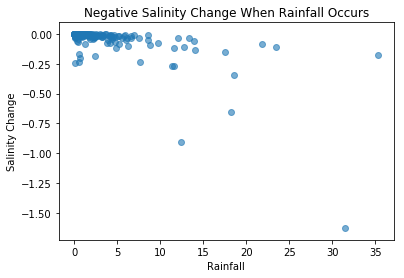

In [253]:
plt.scatter(first_one['precip'], first_one['sss_change'], alpha=0.6)
plt.title('Negative Salinity Change When Rainfall Occurs')
plt.xlabel('Rainfall')
plt.ylabel('Salinity Change');

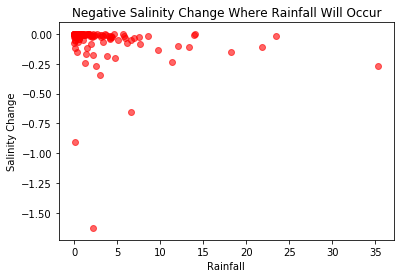

In [254]:
plt.scatter(second_one['precip'], second_one['sss_change'], c='red', alpha=0.6)
plt.title('Negative Salinity Change Where Rainfall Will Occur')
plt.xlabel('Rainfall')
plt.ylabel('Salinity Change');

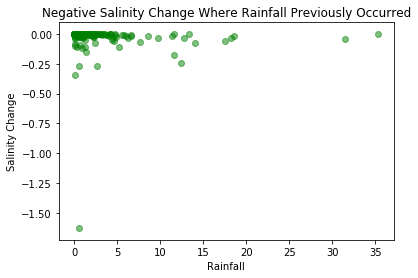

In [255]:
plt.scatter(last_one['precip'], last_one['sss_change'], c='green', alpha=0.5)
plt.title('Negative Salinity Change Where Rainfall Previously Occurred')
plt.xlabel('Rainfall')
plt.ylabel('Salinity Change');

## Specific Rain Events

In [ ]:
### The events with the greatest negative salinity change...
top_change = data[(data['precip'] > 1e-4)].sort_values(by='sss_change', ascending=True)[:15]
top_change.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_change

So, for the ten most extreme (negative) changes in salinity, we see a very strong negative correlation between the change and precipitation. We also expected to see a similar strong correlation with salinity, but we were surprised to see that change in temperature was the second strongest negative correlation with precipitation here. Furthermore, it was interesting to note that wind direction and precipitation have a strong negative correlation, as well as temperature and wind speed. Finally, we were interested in the fact that all of the most extreme changes occured in the late fall/winter months (September to January)

In [258]:
low_change = data[(data['precip'] > 1e-4) & (data['sss_change'] < 0)].sort_values(by='pct_change', ascending=False)[:10]
low_change.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_change

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
scaled_sst,-0.95,0.71,1,0.502,-0.152,-0.207,0.398,-0.0156,-0.813,0.776,-0.303,-0.25,0.71,-0.152,0.502,1,0.0063,0.0063,-0.651,0.373,0.741,0.00479
sst,-0.95,0.71,1,0.502,-0.152,-0.207,0.398,-0.0156,-0.813,0.776,-0.303,-0.25,0.71,-0.152,0.502,1,0.0063,0.0063,-0.651,0.373,0.741,0.00479
spd_pct_change,-0.668,0.288,0.741,0.239,0.0732,-0.155,0.633,0.108,-0.543,0.481,0.111,0.37,0.288,0.0732,0.239,0.741,-0.0633,-0.0633,-0.252,0.304,1,-0.064
year,0.951,-0.895,-0.813,-0.67,-0.27,-0.133,-0.282,-0.226,1,-0.997,-0.111,0.354,-0.895,-0.27,-0.67,-0.813,0.123,0.123,0.679,-0.274,-0.543,0.125
scaled_spd,-0.623,0.707,0.502,1,0.116,-0.0089,-0.0026,0.0507,-0.67,0.676,0.0293,-0.255,0.707,0.116,1,0.502,-0.215,-0.215,-0.798,-0.196,0.239,-0.216
wind_spd,-0.623,0.707,0.502,1,0.116,-0.0089,-0.0026,0.0507,-0.67,0.676,0.0293,-0.255,0.707,0.116,1,0.502,-0.215,-0.215,-0.798,-0.196,0.239,-0.216
time,1,-0.841,-0.95,-0.623,-0.0528,0.0364,-0.376,-0.101,0.951,-0.929,0.102,0.312,-0.841,-0.0528,-0.623,-0.95,0.0323,0.0323,0.703,-0.342,-0.668,0.034
hour,0.312,-0.522,-0.25,-0.255,0.326,0.0541,0.378,-0.117,0.354,-0.393,0.36,1,-0.522,0.326,-0.255,-0.25,0.0535,0.0535,0.39,-0.305,0.37,0.0545
sss,-0.841,1,0.71,0.707,0.132,0.0897,-0.0573,-0.0151,-0.895,0.916,-0.18,-0.522,1,0.132,0.707,0.71,-0.093,-0.093,-0.574,0.325,0.288,-0.0949
scaled_sss,-0.841,1,0.71,0.707,0.132,0.0897,-0.0573,-0.0151,-0.895,0.916,-0.18,-0.522,1,0.132,0.707,0.71,-0.093,-0.093,-0.574,0.325,0.288,-0.0949


In [259]:
top_rain = data[(data['precip'] > 1e-4) & (data['sss_change'] <0)].sort_values(by='precip', ascending=False)[:10]
top_rain.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_rain

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
scaled_sss,0.41,1,-0.384,0.504,0.509,-0.517,-0.482,-0.411,0.39,-0.202,-0.579,0.241,1,0.509,0.504,-0.384,0.976,0.976,0.982,-0.201,0.299,0.976
sss,0.41,1,-0.384,0.504,0.509,-0.517,-0.482,-0.411,0.39,-0.202,-0.579,0.241,1,0.509,0.504,-0.384,0.976,0.976,0.982,-0.201,0.299,0.976
pct_change,0.348,0.976,-0.379,0.441,0.548,-0.485,-0.517,-0.304,0.381,-0.247,-0.503,0.31,0.976,0.548,0.441,-0.379,1,1,0.984,-0.192,0.277,1
pct_c_scaled,0.348,0.976,-0.379,0.441,0.548,-0.485,-0.517,-0.304,0.381,-0.247,-0.503,0.31,0.976,0.548,0.441,-0.379,1,1,0.984,-0.192,0.277,1
sss_change,0.348,0.976,-0.379,0.441,0.548,-0.485,-0.517,-0.303,0.381,-0.248,-0.503,0.311,0.976,0.548,0.441,-0.379,1,1,0.984,-0.192,0.277,1
sst_pct_change,0.347,0.982,-0.338,0.459,0.497,-0.471,-0.487,-0.339,0.356,-0.211,-0.475,0.293,0.982,0.497,0.459,-0.338,0.984,0.984,1,-0.167,0.375,0.984
month,-0.23,-0.202,0.675,-0.428,-0.17,-0.436,-0.212,-0.126,-0.816,1,0.555,0.0458,-0.202,-0.17,-0.428,0.675,-0.247,-0.247,-0.211,-0.374,0.106,-0.248
time,1,0.41,-0.394,0.114,-0.343,-0.305,0.138,-0.169,0.75,-0.23,-0.662,0.307,0.41,-0.343,0.114,-0.394,0.348,0.348,0.347,0.577,-0.122,0.348
spd_pct_change,-0.122,0.299,-0.199,0.602,0.41,-0.2,-0.526,-0.622,-0.14,0.106,-0.00433,0.0886,0.299,0.41,0.602,-0.199,0.277,0.277,0.375,0.111,1,0.277
scaled_spd,0.114,0.504,-0.726,1,0.673,-0.157,-0.488,-0.768,0.373,-0.428,-0.638,-0.163,0.504,0.673,1,-0.726,0.441,0.441,0.459,0.0585,0.602,0.441


In [262]:
low_rain = data[(data['precip'] > 1e-4) & (data['sss_change'] < 0)].sort_values(by='precip', ascending=True)[:30]
low_rain.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_rain

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
hour,0.125,-0.0178,-0.07,-0.126,0.143,-0.16,-0.105,-0.0965,0.179,-0.176,0.151,1,-0.0178,0.143,-0.126,-0.07,0.104,0.104,0.0358,0.182,0.0164,0.104
scaled_sss,0.1,1,0.32,0.462,-0.291,-0.151,-0.47,-0.433,-0.13,0.343,-0.417,-0.0178,1,-0.291,0.462,0.32,0.62,0.62,0.486,-0.239,0.347,0.62
sss,0.1,1,0.32,0.462,-0.291,-0.151,-0.47,-0.433,-0.13,0.343,-0.417,-0.0178,1,-0.291,0.462,0.32,0.62,0.62,0.486,-0.239,0.347,0.62
month,-0.258,0.343,0.483,0.166,-0.204,-0.139,0.197,0.0906,-0.787,1,0.0539,-0.176,0.343,-0.204,0.166,0.483,-0.0291,-0.0291,-0.0947,-0.193,0.225,-0.0291
sst,0.142,0.32,1,0.0516,-0.104,-0.0778,0.107,0.0296,-0.207,0.483,-0.0412,-0.07,0.32,-0.104,0.0516,1,-0.324,-0.324,-0.333,-0.119,0.0564,-0.325
scaled_sst,0.142,0.32,1,0.0516,-0.104,-0.0778,0.107,0.0296,-0.207,0.483,-0.0412,-0.07,0.32,-0.104,0.0516,1,-0.324,-0.324,-0.333,-0.119,0.0564,-0.325
wind_spd,-0.0294,0.462,0.0516,1,-0.165,-0.0625,0.028,-0.0318,-0.109,0.166,-0.26,-0.126,0.462,-0.165,1,0.0516,0.431,0.431,0.491,-0.288,0.579,0.431
scaled_spd,-0.0294,0.462,0.0516,1,-0.165,-0.0625,0.028,-0.0318,-0.109,0.166,-0.26,-0.126,0.462,-0.165,1,0.0516,0.431,0.431,0.491,-0.288,0.579,0.431
dir_pct_change,-0.0247,-0.239,-0.119,-0.288,-0.208,-0.0586,0.14,0.179,0.105,-0.193,-0.0317,0.182,-0.239,-0.208,-0.288,-0.119,-0.14,-0.14,-0.221,1,-0.323,-0.14
day,0.00252,-0.417,-0.0412,-0.26,0.0416,-0.0337,0.388,0.269,-0.0782,0.0539,1,0.151,-0.417,0.0416,-0.26,-0.0412,-0.266,-0.266,-0.28,-0.0317,0.0373,-0.266


In [264]:
top_wind = data[(data['precip'] > 1e-4) & (data['pct_change'] < 0)].sort_values(by='spd_pct_change', ascending=False)[:30]
top_wind.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
sss_change,0.243,0.893,-0.279,0.352,-0.178,-0.519,-0.412,-0.38,0.215,-0.0991,-0.225,0.0275,0.893,-0.178,0.352,-0.279,1,1,0.469,0.0124,-0.12,1
pct_c_scaled,0.242,0.893,-0.279,0.351,-0.179,-0.518,-0.411,-0.38,0.215,-0.0987,-0.224,0.0287,0.893,-0.179,0.351,-0.279,1,1,0.468,0.0124,-0.12,1
pct_change,0.242,0.893,-0.279,0.351,-0.179,-0.518,-0.411,-0.38,0.215,-0.0987,-0.224,0.0287,0.893,-0.179,0.351,-0.279,1,1,0.468,0.0124,-0.12,1
scaled_sss,0.0332,1,-0.152,0.381,-0.0869,-0.407,-0.461,-0.462,0.00355,0.0445,-0.255,0.107,1,-0.0869,0.381,-0.152,0.893,0.893,0.3,0.0319,-0.0935,0.893
sss,0.0332,1,-0.152,0.381,-0.0869,-0.407,-0.461,-0.462,0.00355,0.0445,-0.255,0.107,1,-0.0869,0.381,-0.152,0.893,0.893,0.3,0.0319,-0.0935,0.893
spd_pct_change,-0.23,-0.0935,0.261,-0.252,-0.0813,-0.198,0.0493,0.222,-0.192,0.0794,0.157,-0.0274,-0.0935,-0.0813,-0.252,0.261,-0.12,-0.12,-0.231,0.0527,1,-0.12
sst_pct_change,0.325,0.3,-0.274,0.103,-0.0327,-0.157,-0.263,-0.244,0.239,-0.0717,-0.0353,-0.208,0.3,-0.0327,0.103,-0.274,0.468,0.468,1,-0.0459,-0.231,0.469
scaled_spd,-0.0779,0.381,-0.325,1,0.135,-0.132,0.0281,-0.00691,0.142,-0.29,-0.229,0.263,0.381,0.135,1,-0.325,0.351,0.351,0.103,0.222,-0.252,0.352
wind_spd,-0.0779,0.381,-0.325,1,0.135,-0.132,0.0281,-0.00691,0.142,-0.29,-0.229,0.263,0.381,0.135,1,-0.325,0.351,0.351,0.103,0.222,-0.252,0.352
time,1,0.0332,-0.389,-0.0779,-0.134,-0.12,-0.263,-0.319,0.804,-0.333,-0.145,0.179,0.0332,-0.134,-0.0779,-0.389,0.242,0.242,0.325,0.000212,-0.23,0.243


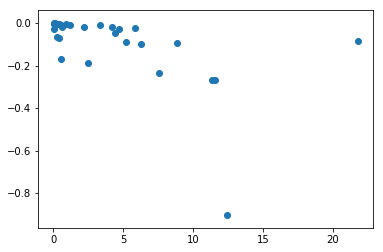

In [265]:
plt.scatter(top_wind['precip'], top_wind['sss_change'])

In [268]:
low_wind = data[(data['precip'] > 1e-4) & (data['pct_change'] < 0)].sort_values(by='spd_pct_change', ascending=True)[:30]
low_wind.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
sss_change,0.266,0.953,-0.378,0.115,0.144,-0.653,-0.648,-0.553,0.354,-0.268,-0.305,0.339,0.953,0.144,0.115,-0.378,1,1,0.885,0.0394,0.0745,1
pct_c_scaled,0.266,0.954,-0.378,0.115,0.143,-0.653,-0.648,-0.553,0.354,-0.268,-0.305,0.338,0.954,0.143,0.115,-0.378,1,1,0.885,0.0393,0.0744,1
pct_change,0.266,0.954,-0.378,0.115,0.143,-0.653,-0.648,-0.553,0.354,-0.268,-0.305,0.338,0.954,0.143,0.115,-0.378,1,1,0.885,0.0393,0.0744,1
scaled_sss,0.207,1,-0.293,0.12,0.0746,-0.64,-0.629,-0.601,0.26,-0.18,-0.339,0.331,1,0.0746,0.12,-0.293,0.954,0.954,0.863,0.12,0.0471,0.953
sss,0.207,1,-0.293,0.12,0.0746,-0.64,-0.629,-0.601,0.26,-0.18,-0.339,0.331,1,0.0746,0.12,-0.293,0.954,0.954,0.863,0.12,0.0471,0.953
sst_pct_change,0.267,0.863,-0.309,0.126,0.105,-0.567,-0.573,-0.493,0.357,-0.265,-0.39,0.217,0.863,0.105,0.126,-0.309,0.885,0.885,1,-0.00392,0.0438,0.885
time,1,0.207,-0.291,0.223,-0.12,-0.151,-0.064,-0.133,0.723,-0.208,-0.103,-0.0218,0.207,-0.12,0.223,-0.291,0.266,0.266,0.267,0.19,0.0736,0.266
hour,-0.0218,0.331,-0.233,0.0536,0.0223,-0.14,-0.104,-0.119,-0.0919,0.114,-0.0374,1,0.331,0.0223,0.0536,-0.233,0.338,0.338,0.217,0.0312,0.0276,0.339
dir_pct_change,0.19,0.12,-0.112,-0.183,0.141,-0.093,-0.168,-0.275,0.0492,0.089,-0.0321,0.0312,0.12,0.141,-0.183,-0.112,0.0393,0.0393,-0.00392,1,-0.179,0.0394
year,0.723,0.26,-0.696,0.254,0.0627,-0.0874,-0.113,-0.115,1,-0.824,-0.24,-0.0919,0.26,0.0627,0.254,-0.696,0.354,0.354,0.357,0.0492,0.131,0.354


## Other Models?

We wanted to look at association rules, but they don't take numeric values; we'd have to create classes

In [368]:
import apyori
from sklearn.model_selection import train_test_split
from apyori import apriori
from sklearn.linear_model import (Lasso, Ridge, RidgeClassifier, 
LinearRegression, LogisticRegression)
X = first_one.loc[:, ['scaled_sss','scaled_sst','scaled_spd','sss_change']]
y = first_one.loc[:, 'precip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [322]:
from sklearn.model_selection import GridSearchCV
params ={'alpha': np.linspace(0.001, 0.01, 10)}
reg = Ridge()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print(reg.score(X_test, y_test))

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse_s1 = math.sqrt(mean_squared_error(y_test, predictions))
print(rmse_s1)
print(mean_squared_error(y_test, predictions))

0.609504518947316
2.716496841830024
7.379355091672495


In [335]:
X1 = first_one.loc[:, ['scaled_spd','sss_change','scaled_sst']]
y1 = first_one.loc[:, 'cum_precip3'].values
y1 = [1 if i >2.0 else 0 for i in y1]
y1 = pd.DataFrame(y1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [353]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1, 10, 50, 100], 'multi_class': ['multinomial','auto'],
               'solver': ['lbfgs','sag','saga','newton-cg'], 'max_iter': [100, 200,500],
             'warm_start': [True]}
reg1 = LogisticRegression(warm_start=True)
reg1.fit(X_train1, y_train1)
predictions1 = reg1.predict(X_test1)
predictions2 = reg1.predict(X_train1)
print(reg1.score(X_test1, y_test1))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train1, predictions2))
confusion_matrix(y_test1, predictions1)

0.5901639344262295
[[161   0]
 [ 72   7]]


C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[34,  0],
       [25,  2]], dtype=int64)

In [354]:
grid_search = GridSearchCV(estimator = reg1, param_grid = parameters,
                           scoring = 'accuracy', cv = 10, n_jobs = 1)
grid_search = grid_search.fit(X_train1, y_train1)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)


C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reach

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y w

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reach

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reach

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reach

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reach

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validati

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.7916666666666666
{'C': 100, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs', 'warm_start': True}
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=True)


In [355]:
new_try = grid_search.best_estimator_.predict(X_test1)
confusion_matrix(y_test1, new_try)

array([[34,  0],
       [16, 11]], dtype=int64)

In [325]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
print(lin.score(X_test, y_test))

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse_s1 = math.sqrt(mean_squared_error(y_test, lin_pred))
print(rmse_s1)
print(mean_squared_error(y_test, lin_pred))

0.5336510209356125
2.968634384581488
8.812790109319511


...So clearly linear models do not work

In [369]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=500, warm_start=True)
rf.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score, cross_val_predict
y_scores = cross_val_predict(rf, X_train, y_train, cv=3)
rft_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)
print(mean_absolute_error(y_train, rft_pred))
mean_absolute_error(y_test, rf_pred)

0.6109345572754341


1.4626347552264103

...And nor does warm start

In [371]:
rf.feature_importances_

array([0.09995196, 0.11117895, 0.20658546, 0.58228363])

# Spurs2

## Binning Rainfall

In [22]:
print(data2['precip'].sum())
data2['precip'].describe()

3927.2051423026883


count    10459.000000
mean         0.375486
std          1.927136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         45.403696
Name: precip, dtype: float64

In [23]:
large = data2[data2['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = data2[(data2['precip'] > 0) & (data2['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = data2[(data2['precip'] > 0.21) & (data2['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 953.5881939600546 mm over 43 events
Marginal rainfall: 58.33822054609101 mm over 656 events
Rainfall: 546.759144875758 mm over 651 events


In [24]:
data2['precip'].sum()

3927.2051423026883

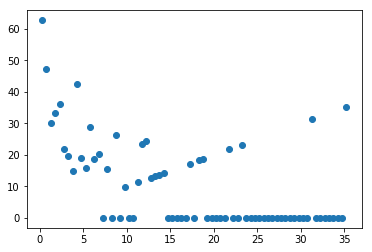

In [25]:
plt.scatter(x=bin_centers, y=sums)

In this spurs2 set, we know there are far more rain events, especially larger ones. Thus, it is not surprising that 50% of our rainfall occurs at a much higher threshold than Spurs1, at about 6.92 mm/ hr

In [28]:
rain2 = data2[data2['precip'] > 1e-3]['precip']
print(rain2.median())
print(rain2.mean())
#print(rain.cumsum())

0.5300016591747934
2.187857644284851


In [29]:
ordered_rain2 = rain2.sort_values(ascending=True)
new_sum2 = np.array(ordered_rain2).cumsum()
scaled_sum2 = new_sum2/new_sum2.max()
len(scaled_sum2[scaled_sum2 >= 0.5])
#new_sum2[-50:]
ordered_rain2[-141:]

new_time
2016-09-19 03:29:59.999971200     7.478358
2017-09-23 01:30:00.000000000     7.486818
2017-03-21 05:30:00.000028800     7.521696
2017-01-21 12:29:59.999971200     7.550285
2017-01-27 18:29:59.999971200     7.607717
2017-06-18 20:30:00.000028800     7.660142
2017-08-26 17:30:00.000028800     7.711738
2016-12-12 08:30:00.000028800     7.722547
2016-12-07 02:30:00.000028800     7.753651
2017-08-14 09:29:59.999971200     7.789318
2016-09-25 14:30:00.000028800     7.796670
2016-11-11 07:30:00.000000000     7.856330
2017-06-18 02:30:00.000028800     7.930219
2016-11-06 03:29:59.999971200     7.957975
2017-07-06 15:29:59.999971200     7.990504
2016-09-25 12:29:59.999971200     8.101302
2017-05-31 06:29:59.999971200     8.188340
2016-09-01 19:30:00.000000000     8.219952
2017-07-27 12:29:59.999971200     8.263248
2017-01-06 02:30:00.000028800     8.314455
2017-10-07 02:30:00.000028800     8.416684
2017-07-27 15:29:59.999971200     8.438278
2016-10-10 21:29:59.999971200     8.446409
20

In [30]:
141/len(rain2)

0.07855153203342619

First Quantile of Annual Rainfall 0.11597831968317873
Midpoint of Annual Rainfall 0.5300016591747934
Third Quantile of Annual Rainfall 2.22217659125831


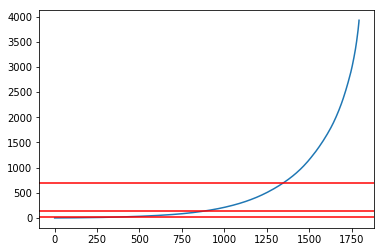

In [31]:
plt.plot(new_sum2)
plt.axhline(y=np.quantile(new_sum2, 0.5), c='r')
plt.axhline(y=np.quantile(new_sum2, 0.75), c='r')
plt.axhline(y=np.quantile(new_sum2, 0.25), c='r')
print('First Quantile of Annual Rainfall', np.quantile(ordered_rain2, 0.25))
print('Midpoint of Annual Rainfall', np.quantile(ordered_rain2, 0.50))
print('Third Quantile of Annual Rainfall', np.quantile(ordered_rain2, 0.75))

So we actually see that Spurs2 follows the same exponential-type curve, even if the 75th quantile is at a higher point on the curve

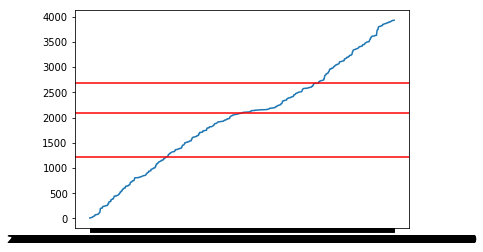

In [34]:
rain_sum = rain2.cumsum()
plt.plot(rain_sum)
plt.axhline(y=np.quantile(rain_sum, 0.5), c='r')
plt.axhline(y=np.quantile(rain_sum, 0.75), c='r')
plt.axhline(y=np.quantile(rain_sum, 0.25), c='r');
#print('First Quantile of Annual Rainfall', np.quantile(rain_sum, 0.25))
#print('Midpoint of Annual Rainfall', np.quantile(rain_sum, 0.50))
#print('Third Quantile of Annual Rainfall', np.quantile(rain_sum, 0.75))

## Lagged Time Variables

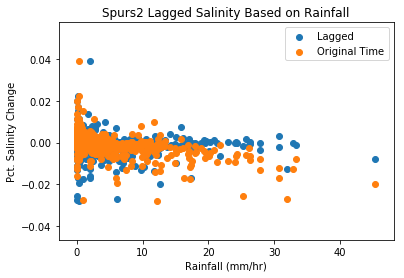

In [287]:
rain_lag2 = pd.DataFrame(rain2['precip'].reset_index().drop('new_time', axis=1))
pct_rain_lag2 = pd.DataFrame(rain2['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
rainlagged = pd.concat([rain_lag2, pct_rain_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=rain_lag2, y=pct_rain_lag2, label='Lagged')
plt.scatter(x=rain2['precip'], y=rain2['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('Spurs2 Lagged Salinity Based on Rainfall')
plt.legend()
plt.show()

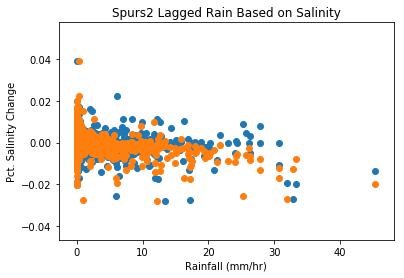

In [288]:
rainlag2 = pd.DataFrame(data2['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
pct_lag2 = pd.DataFrame(data2['pct_change'].reset_index().drop('new_time', axis=1))
lagged2 = pd.concat([rainlag2, pct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=rainlag2, y=pct_lag2, label='Lagged')
plt.scatter(x=data2['precip'], y=data2['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('Spurs2 Lagged Rain Based on Salinity')
plt.show()

In [289]:
## Lagged on Salinity Change-- did rain cause?
rainlagged.corr()

,precip,pct_change
precip,1.000000,-0.118177
pct_change,-0.118177,1.000000


In [290]:
# Lagged on rainfall-- did a salinity change cause?
lagged2.corr()

,precip,pct_change
precip,1.000000,-0.216265
pct_change,-0.216265,1.000000


In [293]:
## Same hour, when rain occurred
rain2 = data2[data2['precip'] > 0]
rain2[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.508551
pct_change,-0.508551,1.000000


In [166]:
# The unaltered data set
data2[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.429775
pct_change,-0.429775,1.000000


So again, we can conclude that there is no greater effect of salinity on rainfall (and vice versa) than when any rain actually occurs, and within the same hour.

## Other Correlations

In [148]:
## We can see that, directly, no variable has a strong correlation with rainfall here
data2.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
sst_pct_change,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.166910,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
scaled_sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
year,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.070216,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
wind_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
scaled_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.028915,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.015004,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


In [152]:
rain_prev2 = data2['precip'].reset_index().drop('new_time', axis=1).shift(-1).fillna(0)
data_prev2 = data2.reset_index().drop(['new_time', 'precip'], axis=1)
data_prev2 = pd.concat([rain_prev2,data_prev2], axis=1, join='outer')


rain_lagged2 = data2['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0)
data_lagged2 = data2.reset_index().drop(['new_time', 'precip'], axis=1)
data_lagged2 = pd.concat([rain_lagged2,data_lagged2], axis=1, join='outer')
data_lagged2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.216265,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.216265,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
scaled_sss,-0.177340,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,-0.177340,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sst_pct_change,-0.123902,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
year,-0.070216,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
wind_spd,-0.050491,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
scaled_spd,-0.050491,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,-0.028480,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,-0.014940,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


In [153]:
data_prev2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.136712,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.136712,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
scaled_sss,-0.128592,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,-0.128592,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sst_pct_change,-0.074619,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
year,-0.070460,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
scaled_spd,-0.039824,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
wind_spd,-0.039824,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,-0.029024,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,-0.015069,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


## Only Rain Events That Changed Salinity

In [154]:
data2.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.002945,0.035635,0.006050,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005042,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006050,1.000000,1.000000,0.357960,0.013305,0.000787
pct_change,-0.002945,0.035635,0.006049,0.047182,-0.004090,-0.429775,-0.248179,-0.056030,-0.005041,0.004830,...,-0.003506,0.035635,-0.004090,0.047182,0.006049,1.000000,1.000000,0.357960,0.013305,0.000787
sst_pct_change,0.006947,0.024518,0.037906,-0.059160,0.011483,-0.166910,-0.137857,-0.065479,0.008026,-0.005175,...,0.363461,0.024518,0.011483,-0.059160,0.037906,0.357960,0.357960,1.000000,0.026006,-0.023019
scaled_sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
sss,0.204595,1.000000,-0.452150,0.425725,-0.575275,-0.161124,-0.223944,-0.262578,0.623705,-0.770663,...,0.003719,1.000000,-0.575275,0.425725,-0.452150,0.035635,0.035635,0.024518,0.014290,-0.018451
year,0.792294,0.623705,-0.082629,0.189060,-0.282705,-0.070216,-0.092548,-0.114403,1.000000,-0.657014,...,-0.000750,0.623705,-0.282705,0.189060,-0.082629,-0.005041,-0.005042,0.008026,0.013973,0.001153
wind_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
scaled_spd,-0.068397,0.425725,-0.451008,1.000000,-0.302924,-0.044964,-0.059969,-0.062804,0.189060,-0.391873,...,0.006853,0.425725,-0.302924,1.000000,-0.451008,0.047182,0.047182,-0.059160,0.021393,-0.045356
day,0.021032,-0.004914,-0.001553,-0.038290,0.030036,-0.028915,-0.037566,-0.046122,-0.043480,0.010181,...,0.000956,-0.004914,0.030036,-0.038290,-0.001553,-0.002374,-0.002374,-0.004959,-0.010532,0.003852
time,1.000000,0.204595,0.243213,-0.068397,0.000386,-0.015004,-0.019691,-0.023530,0.792294,-0.063662,...,0.001014,0.204595,0.000386,-0.068397,0.243213,-0.002945,-0.002945,0.006947,0.007192,0.017249


In [161]:
first2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)]
first2.corr().sort_values(by='precip', ascending=True)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_change,0.041033,0.445131,-0.041984,0.313121,-0.091650,-0.591575,-0.637843,-0.569691,0.128589,-0.178489,...,0.010315,0.445131,-0.091650,0.313121,-0.041984,1.000000,1.000000,0.587705,0.037814,-0.035803
pct_c_scaled,0.041033,0.445131,-0.041984,0.313121,-0.091650,-0.591575,-0.637843,-0.569691,0.128589,-0.178489,...,0.010315,0.445131,-0.091650,0.313121,-0.041984,1.000000,1.000000,0.587705,0.037814,-0.035803
sst_pct_change,0.051109,0.329382,-0.145271,0.235902,-0.066195,-0.295066,-0.356211,-0.306041,0.120191,-0.146556,...,0.145936,0.329382,-0.066195,0.235902,-0.145271,0.587705,0.587705,1.000000,0.062853,-0.049799
sss,0.235153,1.000000,-0.360072,0.297319,-0.298798,-0.279175,-0.395232,-0.396581,0.554583,-0.681386,...,-0.027229,1.000000,-0.298798,0.297319,-0.360072,0.445131,0.445131,0.329382,0.005439,0.006593
scaled_sss,0.235153,1.000000,-0.360072,0.297319,-0.298798,-0.279175,-0.395232,-0.396581,0.554583,-0.681386,...,-0.027229,1.000000,-0.298798,0.297319,-0.360072,0.445131,0.445131,0.329382,0.005439,0.006593
year,0.836123,0.554583,0.038482,0.131421,-0.139916,-0.088331,-0.094276,-0.115556,1.000000,-0.627977,...,0.000108,0.554583,-0.139916,0.131421,0.038482,0.128589,0.128589,0.120191,-0.014150,0.061330
scaled_spd,-0.011779,0.297319,-0.221532,1.000000,-0.147615,-0.063364,-0.094648,-0.079125,0.131421,-0.248548,...,0.008542,0.297319,-0.147615,1.000000,-0.221532,0.313121,0.313121,0.235902,0.062242,0.010826
wind_spd,-0.011779,0.297319,-0.221532,1.000000,-0.147615,-0.063364,-0.094648,-0.079125,0.131421,-0.248548,...,0.008542,0.297319,-0.147615,1.000000,-0.221532,0.313121,0.313121,0.235902,0.062242,0.010826
day,0.028091,0.077393,-0.008037,-0.075190,0.016041,-0.053838,-0.074042,-0.076585,-0.017767,-0.023209,...,0.046961,0.077393,0.016041,-0.075190,-0.008037,0.034455,0.034455,0.002903,0.045174,0.057666
spd_pct_change,0.068211,0.006593,0.005316,0.010826,0.017939,-0.020477,-0.000269,0.004697,0.061330,-0.020202,...,0.021305,0.006593,0.017939,0.010826,0.005316,-0.035803,-0.035803,-0.049799,0.017144,1.000000


In [158]:
second2 = data_lagged2[(data_lagged2['precip'] > 1e-4) & (data_lagged2['pct_change'] < 0)]
second2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.476856,0.056615,0.467560,-0.022851,0.320604,-0.102873,-0.630769,-0.565534,0.152581,-0.203063,...,0.018710,0.467560,-0.102873,0.320604,-0.022851,1.000000,1.000000,0.624968,0.053428,-0.033369
pct_change,-0.476856,0.056615,0.467560,-0.022851,0.320604,-0.102873,-0.630769,-0.565534,0.152581,-0.203063,...,0.018710,0.467560,-0.102873,0.320604,-0.022851,1.000000,1.000000,0.624968,0.053428,-0.033369
sss,-0.334536,0.252143,1.000000,-0.336032,0.292305,-0.315767,-0.406726,-0.405150,0.567092,-0.685736,...,-0.009893,1.000000,-0.315767,0.292305,-0.336032,0.467560,0.467560,0.330300,0.008731,0.023703
scaled_sss,-0.334536,0.252143,1.000000,-0.336032,0.292305,-0.315767,-0.406726,-0.405150,0.567092,-0.685736,...,-0.009893,1.000000,-0.315767,0.292305,-0.336032,0.467560,0.467560,0.330300,0.008731,0.023703
sst_pct_change,-0.295061,0.041086,0.330300,-0.102005,0.238126,-0.085307,-0.360675,-0.321323,0.113545,-0.154101,...,0.177903,0.330300,-0.085307,0.238126,-0.102005,0.624968,0.624968,1.000000,0.040524,-0.061834
scaled_spd,-0.113078,-0.005162,0.292305,-0.193941,1.000000,-0.143091,-0.103495,-0.085087,0.131482,-0.238004,...,0.019308,0.292305,-0.143091,1.000000,-0.193941,0.320604,0.320604,0.238126,0.038542,0.002010
wind_spd,-0.113078,-0.005162,0.292305,-0.193941,1.000000,-0.143091,-0.103495,-0.085087,0.131482,-0.238004,...,0.019308,0.292305,-0.143091,1.000000,-0.193941,0.320604,0.320604,0.238126,0.038542,0.002010
year,-0.070515,0.838561,0.567092,0.053561,0.131482,-0.156586,-0.082909,-0.102224,1.000000,-0.636668,...,0.024687,0.567092,-0.156586,0.131482,0.053561,0.152581,0.152581,0.113545,-0.023613,0.072822
day,-0.070283,0.038178,0.076948,0.009529,-0.100033,0.021372,-0.085658,-0.083175,-0.008137,-0.026455,...,0.075310,0.076948,0.021372,-0.100033,0.009529,0.052056,0.052056,0.047101,0.030656,0.038019
sst,-0.019156,0.243335,-0.336032,1.000000,-0.193941,0.200385,-0.017390,-0.039301,0.053561,0.248944,...,-0.032556,-0.336032,0.200385,-0.193941,1.000000,-0.022851,-0.022851,-0.102005,0.017918,-0.013160


In [159]:
last_one2 = data_prev2[(data_prev2['precip'] > 1e-4) & (data_prev2['pct_change'] < 0)]
last_one2.corr().sort_values(by='precip', ascending=True)

,precip,time,sss,sst,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_c_scaled,-0.184746,0.022575,0.424269,-0.010228,0.267990,-0.096945,-0.668451,-0.602192,0.111524,-0.176960,...,0.026301,0.424269,-0.096945,0.267990,-0.010228,1.000000,1.000000,0.564076,0.013668,0.008927
pct_change,-0.184746,0.022575,0.424269,-0.010228,0.267990,-0.096945,-0.668451,-0.602192,0.111524,-0.176960,...,0.026301,0.424269,-0.096945,0.267990,-0.010228,1.000000,1.000000,0.564076,0.013668,0.008927
sss,-0.160910,0.249006,1.000000,-0.330029,0.270737,-0.299597,-0.384989,-0.386032,0.560703,-0.682816,...,-0.025327,1.000000,-0.299597,0.270737,-0.330029,0.424269,0.424269,0.319543,0.019296,0.037604
scaled_sss,-0.160910,0.249006,1.000000,-0.330029,0.270737,-0.299597,-0.384989,-0.386032,0.560703,-0.682816,...,-0.025327,1.000000,-0.299597,0.270737,-0.330029,0.424269,0.424269,0.319543,0.019296,0.037604
sst_pct_change,-0.072900,0.014465,0.319543,-0.118144,0.194965,-0.024971,-0.340945,-0.301719,0.089098,-0.143918,...,0.238432,0.319543,-0.024971,0.194965,-0.118144,0.564076,0.564076,1.000000,0.045965,-0.015061
day,-0.067177,-0.007916,0.062994,-0.013642,-0.098927,0.031924,-0.066087,-0.071954,-0.047491,-0.021135,...,0.038919,0.062994,0.031924,-0.098927,-0.013642,0.035909,0.035909,-0.006565,-0.005705,0.019903
year,-0.054306,0.842858,0.560703,0.038714,0.092971,-0.123723,-0.083353,-0.109298,1.000000,-0.623607,...,-0.016277,0.560703,-0.123723,0.092971,0.038714,0.111524,0.111524,0.089098,0.021750,0.044323
spd_pct_change,-0.028838,0.037612,0.037604,0.013432,-0.066727,0.032590,-0.025822,-0.023066,0.044323,-0.029421,...,0.013837,0.037604,0.032590,-0.066727,0.013432,0.008927,0.008927,-0.015061,-0.012096,1.000000
wind_spd,-0.017988,-0.035489,0.270737,-0.205214,1.000000,-0.140721,-0.068053,-0.056242,0.092971,-0.214046,...,0.026256,0.270737,-0.140721,1.000000,-0.205214,0.267990,0.267990,0.194965,0.060025,-0.066727
scaled_spd,-0.017988,-0.035489,0.270737,-0.205214,1.000000,-0.140721,-0.068053,-0.056242,0.092971,-0.214046,...,0.026256,0.270737,-0.140721,1.000000,-0.205214,0.267990,0.267990,0.194965,0.060025,-0.066727


### Plotting It

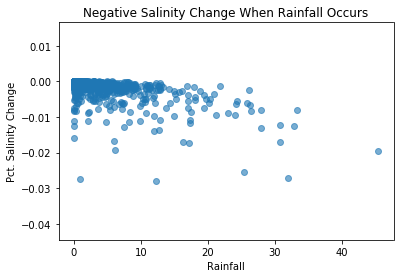

In [160]:
plt.scatter(wishful_thinking2['precip'], wishful_thinking2['pct_change'], alpha=0.6)
plt.title('Negative Salinity Change When Rainfall Occurs')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

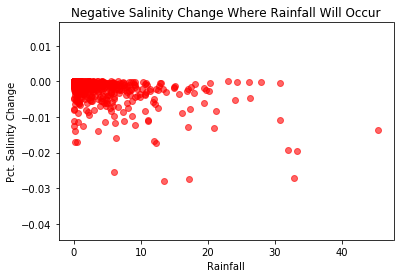

In [162]:
plt.scatter(more_wishful_thinking2['precip'], more_wishful_thinking2['pct_change'], c='red', alpha=0.6)
plt.title('Negative Salinity Change Where Rainfall Will Occur')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

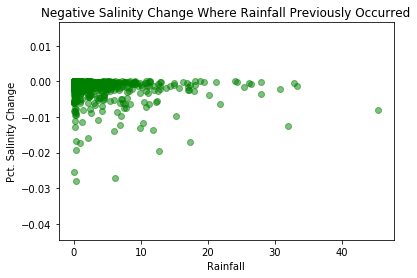

In [163]:
plt.scatter(last_one2['precip'], last_one2['pct_change'], c='green', alpha=0.5)
plt.title('Negative Salinity Change Where Rainfall Previously Occurred')
plt.xlabel('Rainfall')
plt.ylabel('Pct. Salinity Change');

## Specific Rain Events

In [172]:
## The events with the greatest negative salinity change...
top_change2 = data2[(data2['precip'] > 1e-4)].sort_values(by='pct_change', ascending=True)[:10]
top_change2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_change2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
spd_pct_change,-0.234,0.253,-0.0443,0.164,-0.292,-0.397,-0.321,-0.378,-0.282,0.318,-0.0707,-0.175,0.253,-0.292,0.164,-0.0443,0.133,0.133,-0.0919,-0.302,1
day,0.062,0.00419,-0.418,0.286,0.0891,-0.164,-0.344,-0.364,0.00794,0.129,1,0.395,0.00419,0.0891,0.286,-0.418,0.287,0.287,0.38,0.372,-0.0707
dir_pct_change,-0.465,-0.13,0.213,0.615,0.577,-0.146,0.0188,0.0975,-0.531,0.344,0.372,0.337,-0.13,0.577,0.615,0.213,0.224,0.224,-0.16,1,-0.302
month,0.0636,0.599,-0.378,0.203,0.467,-0.0756,-0.442,-0.333,-0.1,1,0.129,0.264,0.599,0.467,0.203,-0.378,0.294,0.294,0.23,0.344,0.318
scaled_sst,-0.639,-0.263,1,0.296,0.0579,-0.0192,0.246,0.133,-0.564,-0.378,-0.418,0.0869,-0.263,0.0579,0.296,1,-0.121,-0.121,-0.474,0.213,-0.0443
sst,-0.639,-0.263,1,0.296,0.0579,-0.0192,0.246,0.133,-0.564,-0.378,-0.418,0.0869,-0.263,0.0579,0.296,1,-0.121,-0.121,-0.474,0.213,-0.0443
pct_change,0.164,0.348,-0.121,0.111,0.287,0.0703,-0.0725,-0.318,0.107,0.294,0.287,0.304,0.348,0.287,0.111,-0.121,1,1,0.72,0.224,0.133
pct_c_scaled,0.164,0.348,-0.121,0.111,0.287,0.0703,-0.0725,-0.318,0.107,0.294,0.287,0.304,0.348,0.287,0.111,-0.121,1,1,0.72,0.224,0.133
wind_spd,-0.344,-0.0794,0.296,1,0.318,0.0854,0.37,0.347,-0.385,0.203,0.286,0.49,-0.0794,0.318,1,0.296,0.111,0.111,-0.144,0.615,0.164
scaled_spd,-0.344,-0.0794,0.296,1,0.318,0.0854,0.37,0.347,-0.385,0.203,0.286,0.49,-0.0794,0.318,1,0.296,0.111,0.111,-0.144,0.615,0.164


In [173]:
low_change2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='pct_change', ascending=False)[:10]
low_change2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_change2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
year,0.778,0.391,0.204,0.533,0.0921,-0.747,-0.707,0.0371,1,-0.544,-0.313,-0.494,0.391,0.0921,0.533,0.204,0.0469,0.0469,-0.769,0.162,-0.554
scaled_sss,-0.109,1,-0.133,0.611,-0.857,-0.736,-0.669,-0.549,0.391,-0.774,0.191,-0.608,1,-0.857,0.611,-0.133,0.59,0.59,-0.288,-0.501,-0.436
sss,-0.109,1,-0.133,0.611,-0.857,-0.736,-0.669,-0.549,0.391,-0.774,0.191,-0.608,1,-0.857,0.611,-0.133,0.59,0.59,-0.288,-0.501,-0.436
wind_spd,0.226,0.611,-0.079,1,-0.431,-0.652,-0.804,-0.481,0.533,-0.533,-0.162,-0.51,0.611,-0.431,1,-0.079,-0.0719,-0.0719,-0.199,-0.23,-0.325
scaled_spd,0.226,0.611,-0.079,1,-0.431,-0.652,-0.804,-0.481,0.533,-0.533,-0.162,-0.51,0.611,-0.431,1,-0.079,-0.0719,-0.0719,-0.199,-0.23,-0.325
time,1,-0.109,0.139,0.226,0.522,-0.544,-0.23,0.378,0.778,0.102,-0.403,0.0905,-0.109,0.522,0.226,0.139,-0.167,-0.167,-0.527,0.0873,-0.559
pct_c_scaled,-0.167,0.59,-0.325,-0.0719,-0.563,-0.445,-0.0162,-0.0616,0.0469,-0.348,0.617,0.00583,0.59,-0.563,-0.0719,-0.325,1,1,0.00787,-0.49,-0.48
pct_change,-0.167,0.59,-0.325,-0.0719,-0.563,-0.445,-0.0162,-0.0616,0.0469,-0.348,0.617,0.00583,0.59,-0.563,-0.0719,-0.325,1,1,0.00787,-0.49,-0.48
day,-0.403,0.191,-0.184,-0.162,-0.41,0.0347,0.184,-0.268,-0.313,-0.12,1,0.281,0.191,-0.41,-0.162,-0.184,0.617,0.617,0.566,-0.127,0.0278
cum_precip6,0.378,-0.549,0.0347,-0.481,0.618,0.0973,0.572,1,0.0371,0.453,-0.268,0.349,-0.549,0.618,-0.481,0.0347,-0.0616,-0.0616,-0.279,0.148,-0.382


In [174]:
top_rain2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] <0)].sort_values(by='precip', ascending=False)[:10]
top_rain2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_rain2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
pct_change,-0.0477,0.796,-0.309,0.645,-0.504,-0.502,-0.761,-0.756,-0.125,0.406,0.144,0.395,0.796,-0.504,0.645,-0.309,1,1,0.825,-0.358,0.671
pct_c_scaled,-0.0477,0.796,-0.309,0.645,-0.504,-0.502,-0.761,-0.756,-0.125,0.406,0.144,0.395,0.796,-0.504,0.645,-0.309,1,1,0.825,-0.358,0.671
sss,0.0922,1,-0.417,0.8,-0.656,-0.463,-0.442,-0.44,-0.000113,0.38,0.541,0.474,1,-0.656,0.8,-0.417,0.796,0.796,0.648,-0.0642,0.405
scaled_sss,0.0922,1,-0.417,0.8,-0.656,-0.463,-0.442,-0.44,-0.000113,0.38,0.541,0.474,1,-0.656,0.8,-0.417,0.796,0.796,0.648,-0.0642,0.405
scaled_spd,-0.155,0.8,-0.0731,1,-0.505,-0.289,-0.189,-0.191,-0.19,0.201,0.0991,0.453,0.8,-0.505,1,-0.0731,0.645,0.645,0.317,-0.0303,0.696
wind_spd,-0.155,0.8,-0.0731,1,-0.505,-0.289,-0.189,-0.191,-0.19,0.201,0.0991,0.453,0.8,-0.505,1,-0.0731,0.645,0.645,0.317,-0.0303,0.696
spd_pct_change,-0.372,0.405,0.00927,0.696,-0.424,-0.275,-0.392,-0.35,-0.385,0.216,-0.36,0.144,0.405,-0.424,0.696,0.00927,0.671,0.671,0.38,-0.413,1
sst_pct_change,0.36,0.648,-0.57,0.317,-0.441,-0.229,-0.575,-0.526,0.244,0.49,0.398,0.452,0.648,-0.441,0.317,-0.57,0.825,0.825,1,-0.271,0.38
month,-0.181,0.38,-0.881,0.201,-0.202,-0.143,-0.279,-0.293,-0.371,1,0.425,0.341,0.38,-0.202,0.201,-0.881,0.406,0.406,0.49,-0.237,0.216
day,0.52,0.541,-0.713,0.0991,-0.406,0.043,0.0943,0.0869,0.389,0.425,1,0.364,0.541,-0.406,0.0991,-0.713,0.144,0.144,0.398,0.15,-0.36


In [175]:
low_rain2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='precip', ascending=True)[:10]
low_rain2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#low_rain2

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
day,-0.478,-0.65,-0.0806,-0.49,0.595,-0.423,0.0312,-0.0385,-0.662,0.715,1,0.325,-0.65,0.595,-0.49,-0.0806,-0.537,-0.537,-0.123,0.057,0.022
pct_change,0.655,0.414,0.127,0.265,-0.274,-0.24,0.0218,0.0758,0.665,-0.545,-0.537,0.27,0.414,-0.274,0.265,0.127,1,1,0.36,-0.257,0.0401
pct_c_scaled,0.655,0.414,0.127,0.265,-0.274,-0.24,0.0218,0.0758,0.665,-0.545,-0.537,0.27,0.414,-0.274,0.265,0.127,1,1,0.36,-0.257,0.0401
hour,0.408,0.051,0.182,0.135,0.465,-0.22,0.0606,0.00729,0.147,0.171,0.325,1,0.051,0.465,0.135,0.182,0.27,0.27,0.677,-0.414,0.0901
sst,0.35,-0.201,1,0.27,-0.167,-0.156,0.198,0.118,0.339,-0.283,-0.0806,0.182,-0.201,-0.167,0.27,1,0.127,0.127,0.129,-0.129,0.262
scaled_sst,0.35,-0.201,1,0.27,-0.167,-0.156,0.198,0.118,0.339,-0.283,-0.0806,0.182,-0.201,-0.167,0.27,1,0.127,0.127,0.129,-0.129,0.262
sst_pct_change,0.263,0.26,0.129,0.155,0.234,-0.0899,-0.245,-0.232,0.229,-0.149,-0.123,0.677,0.26,0.234,0.155,0.129,0.36,0.36,1,-0.514,-0.204
month,-0.7,-0.563,-0.283,-0.738,0.634,-0.0779,0.0231,-0.106,-0.905,1,0.715,0.171,-0.563,0.634,-0.738,-0.283,-0.545,-0.545,-0.149,0.367,-0.173
dir_pct_change,-0.485,-0.141,-0.129,-0.326,-0.463,-0.0779,0.116,0.0786,-0.455,0.367,0.057,-0.414,-0.141,-0.463,-0.326,-0.129,-0.257,-0.257,-0.514,1,-0.0768
scaled_sss,0.443,1,-0.201,0.483,-0.501,0.0511,-0.25,-0.167,0.553,-0.563,-0.65,0.051,1,-0.501,0.483,-0.201,0.414,0.414,0.26,-0.141,-0.157


In [176]:
top_wind2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='wind_spd', ascending=False)[:10]
top_wind2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
hour,-0.385,-0.144,-0.167,-0.21,-0.0552,-0.329,-0.401,-0.417,-0.44,0.152,0.069,1,-0.144,-0.0552,-0.21,-0.167,-0.0418,-0.0418,-0.58,-0.415,0.419
sss,-0.192,1,-0.685,-0.477,-0.951,-0.317,-0.279,-0.258,0.567,-0.982,0.0771,-0.144,1,-0.951,-0.477,-0.685,-0.274,-0.274,0.271,-0.186,-0.292
scaled_sss,-0.192,1,-0.685,-0.477,-0.951,-0.317,-0.279,-0.258,0.567,-0.982,0.0771,-0.144,1,-0.951,-0.477,-0.685,-0.274,-0.274,0.271,-0.186,-0.292
pct_c_scaled,0.241,-0.274,0.403,-0.0533,0.335,-0.22,-0.115,-0.0472,-0.0679,0.41,-0.735,-0.0418,-0.274,0.335,-0.0533,0.403,1,1,0.427,0.0745,-0.0439
pct_change,0.241,-0.274,0.403,-0.0533,0.335,-0.22,-0.115,-0.0472,-0.0679,0.41,-0.735,-0.0418,-0.274,0.335,-0.0533,0.403,1,1,0.427,0.0745,-0.0439
year,0.694,0.567,0.181,-0.0314,-0.315,-0.159,0.1,0.133,1,-0.583,0.257,-0.44,0.567,-0.315,-0.0314,0.181,-0.0679,-0.0679,0.8,0.0237,-0.939
dir_pct_change,0.208,-0.186,0.28,0.0396,0.231,-0.107,-0.108,-0.123,0.0237,0.205,-0.0333,-0.415,-0.186,0.231,0.0396,0.28,0.0745,0.0745,0.0772,1,-0.0651
sst_pct_change,0.742,0.271,0.398,0.25,-0.00437,0.00254,0.269,0.322,0.8,-0.23,-0.192,-0.58,0.271,-0.00437,0.25,0.398,0.427,0.427,1,0.0772,-0.798
day,0.148,0.0771,-0.0337,0.0212,-0.0186,0.0086,0.0702,0.0512,0.257,-0.247,1,0.069,0.0771,-0.0186,0.0212,-0.0337,-0.735,-0.735,-0.192,-0.0333,-0.205
time,1,-0.192,0.831,0.342,0.444,0.0271,0.299,0.323,0.694,0.178,0.148,-0.385,-0.192,0.444,0.342,0.831,0.241,0.241,0.742,0.208,-0.87


In [177]:
low_wind2 = data2[(data2['precip'] > 1e-4) & (data2['pct_change'] < 0)].sort_values(by='wind_spd', ascending=True)[:10]
low_wind2.corr().sort_values(by='precip', ascending=True).style.background_gradient('RdBu_r').set_precision(3)
#top_wind

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,sst_pct_change,dir_pct_change,spd_pct_change
spd_pct_change,-0.173,0.0116,-0.0872,0.044,-0.0901,-0.462,-0.368,-0.387,-0.372,0.422,0.0198,0.397,0.0116,-0.0901,0.044,-0.0872,0.0458,0.0458,0.832,0.303,1
pct_change,0.404,0.432,0.143,-0.258,-0.178,-0.384,0.178,0.265,0.508,-0.408,0.659,0.0102,0.432,-0.178,-0.258,0.143,1,1,0.188,-0.297,0.0458
pct_c_scaled,0.404,0.432,0.143,-0.258,-0.178,-0.384,0.178,0.265,0.508,-0.408,0.659,0.0102,0.432,-0.178,-0.258,0.143,1,1,0.188,-0.297,0.0458
day,-0.0201,0.742,-0.13,-0.141,-0.123,-0.32,0.033,0.162,0.293,-0.621,1,0.372,0.742,-0.123,-0.141,-0.13,0.659,0.659,0.372,-0.0526,0.0198
sst_pct_change,-0.308,0.308,-0.028,-0.238,-0.371,-0.296,-0.231,-0.23,-0.399,0.262,0.372,0.611,0.308,-0.371,-0.238,-0.028,0.188,0.188,1,0.179,0.832
sss,-0.143,1,-0.385,-0.387,0.286,-0.226,-0.285,-0.167,0.256,-0.697,0.742,0.211,1,0.286,-0.387,-0.385,0.432,0.432,0.308,0.00455,0.0116
scaled_sss,-0.143,1,-0.385,-0.387,0.286,-0.226,-0.285,-0.167,0.256,-0.697,0.742,0.211,1,0.286,-0.387,-0.385,0.432,0.432,0.308,0.00455,0.0116
wind_spd,0.325,-0.387,0.169,1,-0.0104,-0.16,-0.135,-0.182,0.14,0.194,-0.141,-0.33,-0.387,-0.0104,1,0.169,-0.258,-0.258,-0.238,-0.263,0.044
scaled_spd,0.325,-0.387,0.169,1,-0.0104,-0.16,-0.135,-0.182,0.14,0.194,-0.141,-0.33,-0.387,-0.0104,1,0.169,-0.258,-0.258,-0.238,-0.263,0.044
hour,-0.341,0.211,0.19,-0.33,-0.219,-0.0865,0.0407,0.0314,-0.334,0.105,0.372,1,0.211,-0.219,-0.33,0.19,0.0102,0.0102,0.611,0.519,0.397


# NTAS Set

## Binning Rainfall

In [38]:
ntas = pd.read_csv('ntas.csv')
ntas = ntas.set_index('new_time')
print(ntas['precip'].sum())
ntas.head()

365.16062089206594


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2001-03-31 01:00:00.000028800,730941.041667,36.224918,25.322590,7.257993,42.888125,0.0,0.0,0.0
2001-03-31 01:59:59.999971200,730941.083333,36.225780,25.307935,7.517357,42.881045,0.0,0.0,0.0
2001-03-31 03:00:00.000000000,730941.125000,36.227262,25.307050,7.063114,42.873965,0.0,0.0,0.0
2001-03-31 04:00:00.000028800,730941.166667,36.227101,25.300624,6.655590,42.866885,0.0,0.0,0.0
2001-03-31 04:59:59.999971200,730941.208333,36.227896,25.291787,7.105266,42.859806,0.0,0.0,0.0


In [39]:
ntas[['precip', 'cum_precip3']].describe()

,precip,cum_precip3
count,8169.000000,8169.000000
mean,0.044701,0.134102
std,0.430652,0.872563
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,15.928774,18.802948


In [40]:
large = ntas[ntas['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = ntas[(ntas['precip'] > 0) & (ntas['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = ntas[(ntas['precip'] > .21) & (ntas['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 15.928773879325464 mm over 1 events
Marginal rainfall: 21.84174295095084 mm over 358 events
Rainfall: 118.08693571022722 mm over 183 events


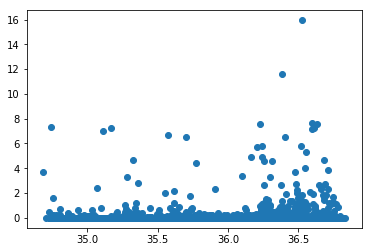

In [41]:
plt.scatter(x=ntas['sss'], y=ntas['precip'])

So here, there are very few instances of any rainfall over 8 mm in an hour.

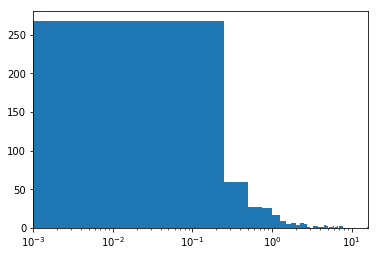

In [42]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(ntas['precip'], bins=np.arange(0.001,16.251,0.25))
plt.xlim([0.001,16.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:64] + 0.125
#bin_centers
#print(a)

In [43]:
n.shape

(64,)

[33.768 22.56  16.902 22.776 19.142 12.384  8.13  11.256  8.504 14.256
 13.13   2.876  0.    10.128  7.252  3.876  4.126  4.376 18.504  9.752
  0.     5.376  5.626 11.752  0.     6.376 13.252  0.    21.378 14.752
 22.878  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    11.626  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.    15.876]


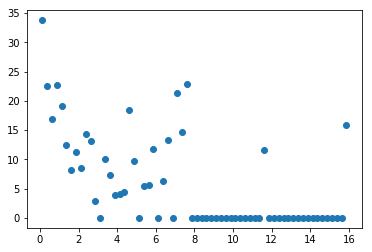

In [44]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

So here, there are very few large values that occur just once.

In [45]:
sums.cumsum()

array([ 33.768,  56.328,  73.23 ,  96.006, 115.148, 127.532, 135.662,
       146.918, 155.422, 169.678, 182.808, 185.684, 185.684, 195.812,
       203.064, 206.94 , 211.066, 215.442, 233.946, 243.698, 243.698,
       249.074, 254.7  , 266.452, 266.452, 272.828, 286.08 , 286.08 ,
       307.458, 322.21 , 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       372.59 ])

And again, we see that this is a valid reflection of the actual summed rainfall for the NTAS buoy

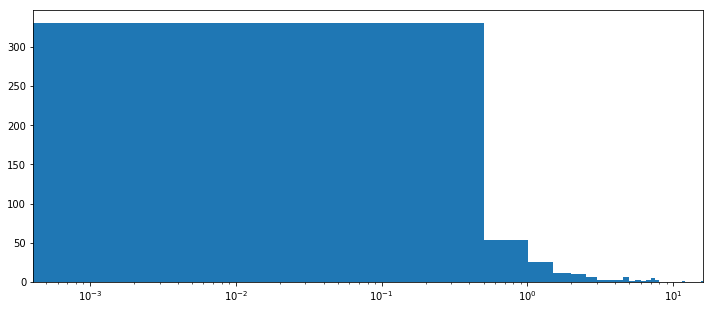

Sum of all binned rainfall= 365.16061891468564 mm


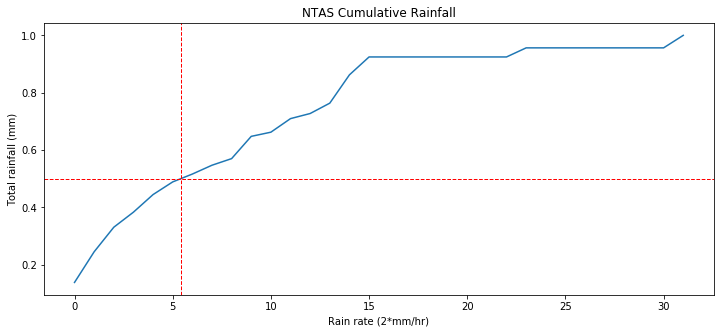

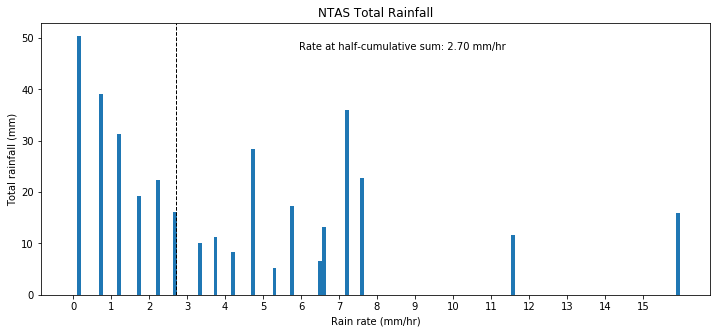

In [46]:
import math
def rain(dataset, name):
    
    rain = dataset[dataset['precip'] > 1e-4]['precip']

    _, ax = plt.subplots(figsize=(12,5))
    (n, bins, patches) = plt.hist(
    rain, bins=np.arange(min(rain), max(rain) + 0.5, 0.5))

    plt.xlim([min(rain), max(rain)])
    plt.xscale('log')
    plt.show()
    
    digitized = np.digitize(rain, bins)
    bin_means = [rain[digitized == i].mean() for i in range(1, len(bins))]
    array = np.nan_to_num(np.array(bin_means))
    sums = np.nan_to_num(np.array(n*bin_means))
    print('Sum of all binned rainfall= {} mm'.format(sums.sum()))
    
    
    fullsum = sums.cumsum()/sums.sum()
    halfsum = (sums.cumsum()/sums.sum())[:math.ceil(max(array))]

    _, ax = plt.subplots(figsize=(12,5))
    plt.plot(fullsum)
    plt.xlabel('Rain rate (2*mm/hr)')
    plt.ylabel('Total rainfall (mm)')
    plt.title('{} Cumulative Rainfall'.format(name))

    ax = plt.gca()
    line = ax.lines[0]
    xvalues = line.get_xdata()
    yvalues = line.get_ydata()
    interp = np.interp(0.5, yvalues, xvalues)
    
    plt.axhline(y=.5, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(x=interp, color='r', linestyle='dashed', linewidth=1)
    
    
    _, ax = plt.subplots(figsize=(12,5))
    plt.bar(x=array, height=sums, width=0.1)
    plt.xlabel('Rain rate (mm/hr)')
    plt.ylabel('Total rainfall (mm)')
    plt.title('{} Total Rainfall'.format(name))
    plt.xticks(np.arange(min(rain), max(rain), 1))

    plt.axvline(interp/2, color='k', linestyle='dashed', linewidth=1)
    _, max_ = plt.ylim()
    plt.text(interp + interp/10, 
        max_ - max_/10, 
        'Rate at half-cumulative sum: {:.2f} mm/hr'.format(interp/2));

rain(ntas, 'NTAS')

In this set, about half of all rainfall occurs below 2.7 millimeters, which we could probably have assumed by the small amount of larger rain events.

In [47]:
ntas['sss_change'] = ntas['sss'].diff().fillna(0)

In [48]:
rain3 = ntas[ntas['precip'] > 1e-3]['precip']
print(rain3.median())
print(rain3.mean())
#print(rain.cumsum())

0.2000039629005584
0.7852890878267831


In [50]:
ordered_rain3 = rain3.sort_values(ascending=True)
new_sum3 = np.array(ordered_rain3).cumsum()
scaled_sum3 = new_sum3/new_sum3.max()
#scaled_sum3
#new_sum3[-50:]
ordered_rain3[-50:]

new_time
2001-10-13 04:00:00.000028800     1.849210
2001-11-01 15:00:00.000000000     1.880032
2001-09-11 21:00:00.000000000     1.941279
2001-11-13 10:00:00.000028800     2.004213
2001-12-13 04:59:59.999971200     2.029582
2001-09-12 04:59:59.999971200     2.114789
2002-03-03 07:59:59.999971200     2.161477
2001-10-23 22:00:00.000028800     2.252497
2002-02-18 10:59:59.999971200     2.310037
2001-09-23 22:59:59.999971200     2.330038
2001-10-13 15:00:00.000000000     2.347604
2002-01-08 03:00:00.000000000     2.380038
2001-09-23 19:00:00.000028800     2.488565
2001-08-13 16:00:00.000028800     2.606601
2001-10-13 10:59:59.999971200     2.610043
2001-11-17 01:00:00.000028800     2.661460
2001-10-11 00:00:00.000000000     2.690044
2001-10-27 04:00:00.000028800     2.734471
2002-01-20 22:59:59.999971200     2.830046
2002-01-20 00:00:00.000000000     3.310053
2001-11-29 03:00:00.000000000     3.328575
2001-07-01 01:59:59.999971200     3.363989
2001-12-25 12:00:00.000000000     3.696687
20

First Quantile of Annual Rainfall 0.08000122908783648
Midpoint of Annual Rainfall 0.2000039629005584
Third Quantile of Annual Rainfall 0.7082075973711752


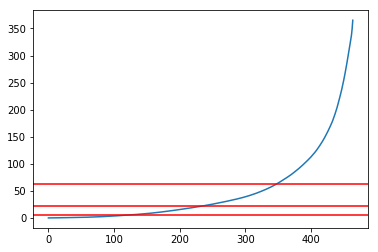

In [51]:
plt.plot(new_sum3)
plt.axhline(y=np.quantile(new_sum3, 0.5), c='r')
plt.axhline(y=np.quantile(new_sum3, 0.75), c='r')
plt.axhline(y=np.quantile(new_sum3, 0.25), c='r')
print('First Quantile of Annual Rainfall', np.quantile(ordered_rain3, 0.25))
print('Midpoint of Annual Rainfall', np.quantile(ordered_rain3, 0.50))
print('Third Quantile of Annual Rainfall', np.quantile(ordered_rain3, 0.75))

First Quantile of Annual Rainfall 0.09621647350675183
Midpoint of Annual Rainfall 0.2424110840135407
Third Quantile of Annual Rainfall 0.6583769652222244


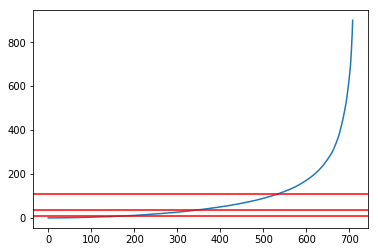

In [66]:
plt.plot(new_sum4)
plt.axhline(y=np.quantile(new_sum4, 0.5), c='r')
plt.axhline(y=np.quantile(new_sum4, 0.75), c='r')
plt.axhline(y=np.quantile(new_sum4, 0.25), c='r')
print('First Quantile of Annual Rainfall', np.quantile(ordered_rain4, 0.25))
print('Midpoint of Annual Rainfall', np.quantile(ordered_rain4, 0.50))
print('Third Quantile of Annual Rainfall', np.quantile(ordered_rain4, 0.75))

## Lagged Time Variables

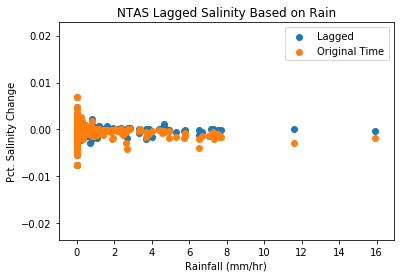

In [306]:
ntaslag2 = pd.DataFrame(ntas['precip'].reset_index().drop('new_time', axis=1))
npct_lag2 = pd.DataFrame(ntas['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
nlag1 = pd.concat([ntaslag2, npct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=ntaslag2, y=npct_lag2, label='Lagged')
plt.scatter(x=ntas['precip'], y=ntas['pct_change'], label='Original Time')
plt.xlabel('Rainfall (mm/hr)')
plt.ylabel('Pct. Salinity Change')
plt.title('NTAS Lagged Salinity Based on Rain')
plt.legend()
plt.show()

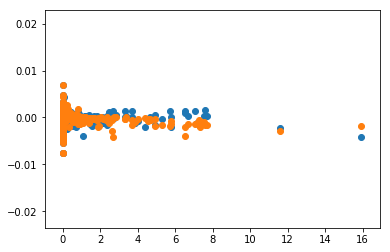

In [176]:
ntaslag2 = pd.DataFrame(ntas['precip'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
npct_lag2 = pd.DataFrame(ntas['pct_change'].reset_index().drop('new_time', axis=1))
nlag2 = pd.concat([ntaslag2, npct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=ntaslag2, y=npct_lag2)
plt.scatter(x=ntas['precip'], y=ntas['pct_change'])
plt.show()

In [172]:
## Correlation between lagged salinity and rainfall-- does salinity change cause rainfall here?
nlag1.corr()

,precip,pct_change
precip,1.000000,-0.037957
pct_change,-0.037957,1.000000


In [177]:
nlag2.corr()

,precip,pct_change
precip,1.000000,-0.094261
pct_change,-0.094261,1.000000


In [112]:
## For just rain events, at 
ntas_rain[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.558027
pct_change,-0.558027,1.000000


In [167]:
ntas[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.223184
pct_change,-0.223184,1.000000


This is an interesting set of correlations, as once again the strongest is when rain occurs and within the same hour. However, it is remarkable to note how low the correlation with a lagged time frame is here, with -0.04 and -0.09 lagged on salinity and rain, respectively.

# WHOTS Set

In [52]:
whots = pd.read_csv('whots.csv')
whots = whots.set_index('new_time')
print(whots['precip'].sum())
whots.head()

899.9853937686307


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2004-08-13 04:00:00.000028800,732172.166667,34.825873,26.888086,7.918918,38.233802,0.000000,0.0,0.000000
2004-08-13 04:59:59.999971200,732172.208333,34.824762,26.865158,7.506199,38.236220,0.000000,0.0,0.000000
2004-08-13 06:00:00.000000000,732172.250000,34.825625,26.856876,8.299770,38.238638,0.000000,0.0,0.000000
2004-08-13 07:00:00.000028800,732172.291667,34.826258,26.842372,8.377580,38.241056,0.000000,0.0,0.000000
2004-08-13 07:59:59.999971200,732172.333333,34.825453,26.828082,8.759666,38.243474,0.350616,0.0,0.350616


In [53]:
whots['precip'].describe()

count    8317.000000
mean        0.108210
std         1.288135
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.250181
Name: precip, dtype: float64

In [54]:
large = whots[whots['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over' ,large['precip'].count(), 'events')
small = whots[(whots['precip'] > 0) & (whots['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = whots[(whots['precip'] > .21) & (whots['precip'] < 2)]
print('Normal rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')


Substantive rainfall: 329.8583652542303 mm over 12 events
Marginal rainfall: 30.75673068121871 mm over 324 events
Normal rainfall: 188.21578865681337 mm over 307 events


So here we see that there are a whopping 12 rain events greater than 15 mm per hour, and that they make up almost 330 millimeters. This is a giant gap compared to the very small rain events.

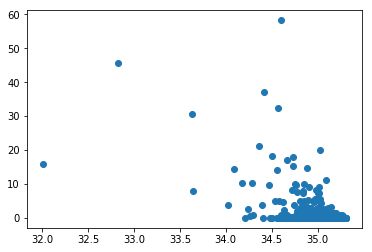

In [55]:
plt.scatter(x=whots['sss'], y=whots['precip'])

This is an interesting plot; we see that there is not much variability in salinity for most of the set, but where there is noticeable difference there is always a rain event.

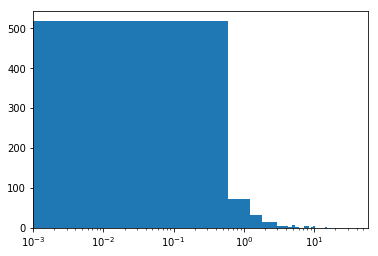

In [56]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(whots['precip'], bins=np.arange(0.001,59.21,0.6))
plt.xlim([0.001,58.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:98] + 0.3
#bin_centers
#print(a)

[156.219  64.872  49.533  33.616  43.216  13.204  15.604  13.503  35.707
  17.103   0.      0.     30.004  32.404   0.     18.602  49.505  10.501
  11.101   0.      0.      0.      0.     14.101  29.402  15.301  15.901
   0.     17.101  17.701  18.301   0.      0.     20.101   0.     21.301
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.     30.301   0.      0.      0.
  32.701   0.      0.      0.      0.      0.      0.      0.     37.501
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.     45.901   0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.     58.501]


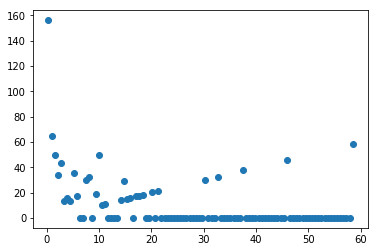

In [57]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

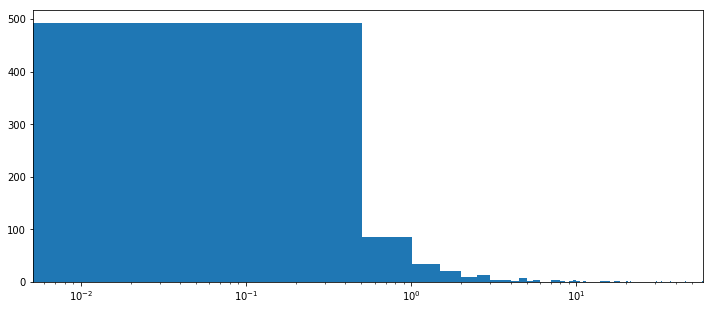

Sum of all binned rainfall= 899.9853937686308 mm


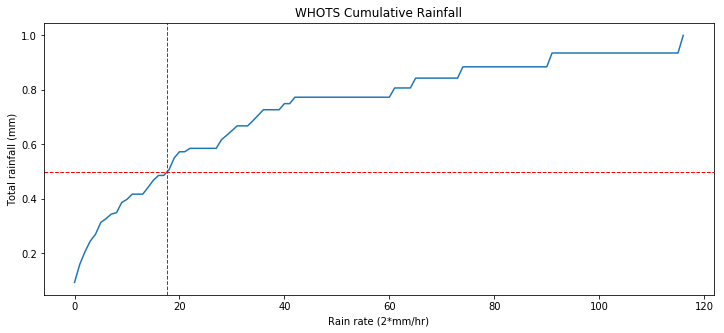

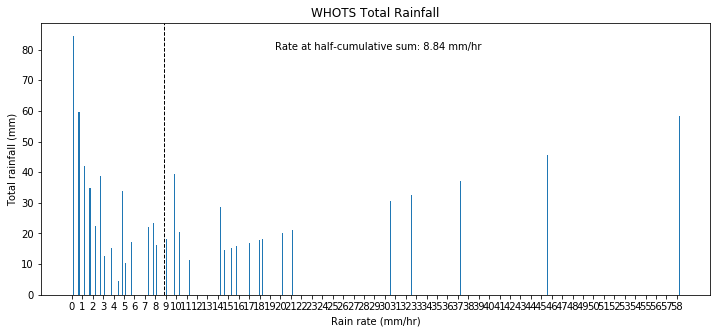

In [58]:
import math
def rain(dataset, name):
    
    rain = dataset[dataset['precip'] > 1e-4]['precip']

    _, ax = plt.subplots(figsize=(12,5))
    (n, bins, patches) = plt.hist(
    rain, bins=np.arange(min(rain), max(rain) + 0.5, 0.5))

    plt.xlim([min(rain), max(rain)])
    plt.xscale('log')
    plt.show()
    
    digitized = np.digitize(rain, bins)
    bin_means = [rain[digitized == i].mean() for i in range(1, len(bins))]
    array = np.nan_to_num(np.array(bin_means))
    sums = np.nan_to_num(np.array(n*bin_means))
    print('Sum of all binned rainfall= {} mm'.format(sums.sum()))
    
    
    fullsum = sums.cumsum()/sums.sum()
    halfsum = (sums.cumsum()/sums.sum())[:math.ceil(max(array))]

    _, ax = plt.subplots(figsize=(12,5))
    plt.plot(fullsum)
    plt.xlabel('Rain rate (2*mm/hr)')
    plt.ylabel('Total rainfall (mm)')
    plt.title('{} Cumulative Rainfall'.format(name))

    ax = plt.gca()
    line = ax.lines[0]
    xvalues = line.get_xdata()
    yvalues = line.get_ydata()
    interp = np.interp(0.5, yvalues, xvalues)
    
    plt.axhline(y=.5, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(x=interp, color='r', linestyle='dashed', linewidth=1)
    
    
    _, ax = plt.subplots(figsize=(12,5))
    plt.bar(x=array, height=sums, width=0.1)
    plt.xlabel('Rain rate (mm/hr)')
    plt.ylabel('Total rainfall (mm)')
    plt.title('{} Total Rainfall'.format(name))
    plt.xticks(np.arange(min(rain), max(rain), 1))

    plt.axvline(interp/2, color='k', linestyle='dashed', linewidth=1)
    _, max_ = plt.ylim()
    plt.text(interp + interp/10, 
        max_ - max_/10, 
        'Rate at half-cumulative sum: {:.2f} mm/hr'.format(interp/2));

rain(whots, 'WHOTS')

In [59]:
## One thought
print('First cumulative third of rainfall:', fullsum[fullsum<0.33].shape)
print('From the first to the second cumul. third:', fullsum[(fullsum >0.33) & (fullsum < .66)].shape)
print('Significant rain events:', fullsum[fullsum > 0.66].shape)

First cumulative third of rainfall: (7,)
From the first to the second cumul. third: (17,)
Significant rain events: (47,)


In [61]:
whots['sss_change'] = whots['sss'].diff().fillna(0)

In [64]:
rain4 = whots[whots['precip'] > 1e-3]['precip']
print(rain4.median())
print(rain4.mean())
#print(rain.cumsum())

0.2424110840135407
1.2693729108161225


In [65]:
ordered_rain4 = rain4.sort_values(ascending=True)
new_sum4 = np.array(ordered_rain4).cumsum()
scaled_sum4 = new_sum4/new_sum4.max()
#scaled_sum4
#new_sum4[-50:]
ordered_rain4[-50:]

new_time
2004-12-27 12:00:00.000000000     3.230875
2004-10-26 03:00:00.000000000     3.614804
2004-12-22 16:00:00.000028800     3.773056
2004-12-22 13:00:00.000028800     3.885887
2005-01-02 01:00:00.000028800     3.894657
2005-02-11 10:59:59.999971200     4.458994
2005-03-14 12:00:00.000000000     4.599983
2004-12-28 06:00:00.000000000     4.602883
2004-11-25 10:00:00.000028800     4.857482
2005-01-01 19:59:59.999971200     4.885639
2004-10-25 22:59:59.999971200     4.908497
2004-12-17 13:59:59.999971200     4.933295
2004-10-26 01:00:00.000028800     5.001171
2005-07-17 15:00:00.000000000     5.046589
2004-12-28 04:00:00.000028800     5.343188
2004-10-25 19:00:00.000028800     5.624283
2004-10-20 18:00:00.000000000     5.687359
2005-02-01 06:00:00.000000000     5.819729
2005-01-01 18:00:00.000000000     7.226763
2005-01-11 16:59:59.999971200     7.273618
2005-01-21 16:00:00.000028800     7.464201
2004-10-26 09:00:00.000000000     7.616808
2004-10-04 10:00:00.000028800     7.912371
20

## Lagged Time Variables

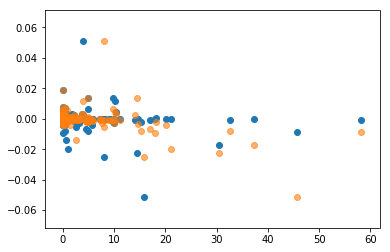

In [60]:
whotslag = pd.DataFrame(whots['precip'].reset_index().drop('new_time', axis=1))
wpct_lag = pd.DataFrame(whots['pct_change'].reset_index().drop('new_time', axis=1).shift(1).fillna(0))
wlag = pd.concat([whotslag, wpct_lag], axis=1, join='outer')
plt.scatter(x=whotslag, y=wpct_lag)
plt.scatter(x=whots['precip'], y=whots['pct_change'], alpha=0.6)
plt.show()

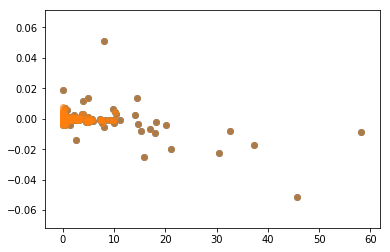

In [181]:
whots_rain = whots[whots['precip'] > 0]
whotslag2 = pd.DataFrame(whots_rain['precip'].reset_index().drop('new_time', axis=1))
wpct_lag2 = pd.DataFrame(whots_rain['pct_change'].reset_index().drop('new_time', axis=1))
w_nolag2 = pd.concat([whotslag2, wpct_lag2], axis=1, join='outer')
#pct_lag
plt.scatter(x=whotslag2, y=wpct_lag2)
plt.scatter(x=whots['precip'], y=whots['pct_change'], alpha=0.6)
plt.show()

In [182]:
w_nolag2.corr()

,precip,pct_change
precip,1.000000,-0.475307
pct_change,-0.475307,1.000000


In [183]:
wlag.corr()

,precip,pct_change
precip,1.000000,-0.171184
pct_change,-0.171184,1.000000


In [184]:
whots[['precip', 'pct_change']].corr()

,precip,pct_change
precip,1.000000,-0.453891
pct_change,-0.453891,1.000000


Finally, we see once again that there is a weak correlation between a lagged variable and rainfall. The strongest correlation is between sss and precipitation in the same hour, and again there is an even stronger correlation between rainfall and salinity in the same hour when rainfall was present. This is a trend for every single buoy, and so we should conclude that lagged variables are probably not what we want to inspect, at least not as a one-variable response. Instead, it appears that any change in salinity due to rainfall (or vice versa) would either be a quick and temporary change due to the rainfall, or an event caused by a sudden change in salinity.

# Conclusions (for now)

In [206]:
## Looking at the distributions of 50% accumulation of rainfall for buoys...
dist = np.array([5.5,6.75,5.5,6.15])
print(np.mean(dist))
print(np.std(dist))

5.975
0.5202163011671204


We can draw three main conclusions from what we've done here:

1) There does not seem to be any hard evidence that putting a time lag on either salinity or rainfall gives a better casual relationship between the two; the best correlations that we see occur within the same hour, and we see an even stronger relationship with every single buoy between the two when rain is present, which makes sense.

2) Each buoy has a relatively different threshold at which 50% of all of it's rainfall has occurred, in terms of rates of rainfall by hour. The more tropical buoys, such as Spurs2 and WHOTS, have a much larger threshold, especially Spurs2; thus, comparing what we classify as a rain event at one buoy may not necessarily be appropriate for another.

3) We see bimodal distributions of rainfall for every single rate, at every single buoy. That is, there are large amounts of very minor rain events, very few at the (relative) middle range for each buoy, and then larger representation for more significant rain events. This is true even in sparse rain climates such as NTAS and Spurs1.

__Thoughts:__ Maybe coming up with a method of classification that does not have to be hard coded, for each third of that area's total annual rainfall per rainfall rate in mm/hr. Therefore, we would have four categories: No Rain, Minor Rain, Rain, Significant Rain; our reasoning behind this is that each of these categories has drastically different representation between each buoy, but they do also all follow the same bimodal trend. Therefore, we believe this to be a reasonable outline of rain classes moving forward.

In [245]:
## One thought
print('First cumulative third of rainfall:', fullsum[fullsum<0.33].shape)
print('From the first to the second cumul. third:', fullsum[(fullsum >0.33) & (fullsum < .66)].shape)
print('Significant rain events:', fullsum[fullsum > 0.66].shape)

First cumulative third of rainfall: (4,)
From the first to the second cumul. third: (21,)
Significant rain events: (73,)
